# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

---

---

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [503]:
# Import warnings
import warnings

In [505]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os


In [507]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [509]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()
df = pd.read_parquet(r'C:\Users\Shagufa Nausheen\Downloads\notebook\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-1.parquet')


df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?
3041714 rows in just one file 2023-1.parquet

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [511]:
os.chdir(r'C:\Users\Shagufa Nausheen\Downloads\notebook\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()
print(file_list)

['2023-1.parquet', '2023-10.parquet', '2023-11.parquet', '2023-12.parquet', '2023-2.parquet', '2023-3.parquet', '2023-4.parquet', '2023-5.parquet', '2023-6.parquet', '2023-7.parquet', '2023-8.parquet', '2023-9.parquet', 'sampled_2023.parquet']


In [518]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r'C:\Users\Shagufa Nausheen\Downloads\notebook\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        
        # Reading the current file
        curr_file = pd.read_parquet(file_path)

        curr_file['tpep_pickup_datetime'] = pd.to_datetime(curr_file['tpep_pickup_datetime'])
        curr_file['date'] = curr_file['tpep_pickup_datetime'].dt.date
        curr_file['hour'] = curr_file['tpep_pickup_datetime'].dt.hour


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in curr_file['date'].unique():
            curr_file_date = curr_file[curr_file['date'] == date]

            for hour in range(24):
                hour_data = curr_file_date[curr_file_date['hour'] == hour]  # Filter data for the specific hour

                if not hour_data.empty:
                    # Sample 5% of the hourly data randomly
                    sample = hour_data.sample(frac=0.05, random_state=42)
                    sampled_data = pd.concat([sampled_data, sample], ignore_index=True)
               


            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        
        df = pd.concat([df, sampled_data], ignore_index=True) # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

In [519]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [522]:
print(f"Total sampled dataset contains {len(df)} rows")

Total sampled dataset contains 1896400 rows


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [524]:
# Save the final sampled dataset to a Parquet file
output_path = os.path.join(os.getcwd(), 'sampled_2023.parquet')
df.to_parquet(output_path, index=False)

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [526]:
# Load the new data file
df_new = pd.read_parquet(r'C:\Users\Shagufa Nausheen\Downloads\notebook\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\sampled_2023.parquet')


In [528]:
# df.head()
df_new.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

         date  hour Airport_fee  
0  2023-01-01     0         NaN  
1  2023-01-01     0         NaN  
2  2023-01-01     0         NaN  
3  2023-01-01     0         NaN  
4  2023-01-01     0         NaN  

[5 rows x 22 columns]

In [530]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections


**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [532]:
# Fix the index and drop any columns that are not needed
df_new=df_new.dropna(axis='columns',how='all')
df_new=df_new.dropna(axis='rows',how='all')
df.reset_index(drop=True, inplace=True)


In [534]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [536]:


# Undersanding the airport fee colums
print('Airport_fee null entry count : ', df_new['Airport_fee'].isnull().sum())
print('airport_fee null entry count : ',df_new['airport_fee'].isnull().sum())
print('Row count where both airport_fee and Airport-fee is null', df_new[(df_new['airport_fee'].isna()) & (df_new['Airport_fee'].isna())].shape[0])
print('Row count where both airport_fee and Airport-fee is not null', df[(df['airport_fee'].notna()) & (df['Airport_fee'].notna())].shape[0])


Airport_fee null entry count :  213357
airport_fee null entry count :  1747917
Row count where both airport_fee and Airport-fee is null 64874
Row count where both airport_fee and Airport-fee is not null 0


In [538]:
# Combine the two airport fee columns
df_new.columns = df_new.columns.str.strip()
print(df_new.columns.tolist())
if 'Airport_fee' in df_new.columns and 'airport_fee' in df_new.columns:
    df_new['airport_fee'] = df_new['airport_fee'].fillna(df_new['Airport_fee'])
    df_new.drop(columns=['Airport_fee'], inplace=True)
    df_new.info()

['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'date', 'hour', 'Airport_fee']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amo

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [540]:
# check where values of fare amount are negative
negative_fare_count = (df_new['fare_amount'] < 0).sum()
print(f"Number of rows where 'fare_amount' is negative: {negative_fare_count}")


Number of rows where 'fare_amount' is negative: 0


Did you notice something different in the `RatecodeID` column for above records?

In [542]:
# Analyse RatecodeID for the negative fare amounts
print('There is no negative fare_amount in the sampled data. Hence no records to analyse RatecodeId based on negative fare amount')


There is no negative fare_amount in the sampled data. Hence no records to analyse RatecodeId based on negative fare amount


In [544]:
numeric_cols = df_new.select_dtypes(include=['number']).columns
print(numeric_cols)

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'hour'],
      dtype='object')


In [546]:
# Find which columns have negative values
numeric_colums_name = df_new.select_dtypes(include=['number']).columns
negative_columns_name = []
for column in numeric_colums_name:
    negative_value_count = (df_new[column] < 0).sum()
    if negative_value_count > 0:
            print(f"Column Name : {column}, Negative Value Count: {negative_value_count}")
            negative_columns_name.append(column)


Column Name : extra, Negative Value Count: 3
Column Name : mta_tax, Negative Value Count: 73
Column Name : improvement_surcharge, Negative Value Count: 78
Column Name : total_amount, Negative Value Count: 78
Column Name : congestion_surcharge, Negative Value Count: 56
Column Name : airport_fee, Negative Value Count: 15


In [548]:
# fix these negative values
print(negative_columns_name)
for column in negative_columns_name:
    df_new[column] = df_new[column].clip(lower=0)
# verify if negative values were replaced
for column in negative_columns_name:
    negative_value_count = (df_new[column] < 0).sum()
    print(f"Column Name : {column}, Negative Value Count: {negative_value_count}")


['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']
Column Name : extra, Negative Value Count: 0
Column Name : mta_tax, Negative Value Count: 0
Column Name : improvement_surcharge, Negative Value Count: 0
Column Name : total_amount, Negative Value Count: 0
Column Name : congestion_surcharge, Negative Value Count: 0
Column Name : airport_fee, Negative Value Count: 0


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [550]:
# Find the proportion of missing values in each column

# Calculate the count and percentage of missing values
missing_counts = df_new.isnull().sum()
missing_percentages = ((df_new.isnull().mean()) * 100).round(2)

# Combine into a single DataFrame
missing_summary = pd.DataFrame({
    "Missing Count": missing_counts,
    "Missing Percentage": missing_percentages
})

# Display columns with missing values
missing_summary[missing_summary["Missing Count"] > 0]

Missing Count  Missing Percentage
passenger_count               64874                3.42
RatecodeID                    64874                3.42
store_and_fwd_flag            64874                3.42
congestion_surcharge          64874                3.42
airport_fee                   64874                3.42

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [552]:
# Display the rows with null values
nan_rows = df_new[df_new.isnull().any(axis=1)]
print(f"Number of rows with missing values: {nan_rows.shape[0]}")
nan_rows.head()

Number of rows with missing values: 64874


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4          2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15         2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
42         2  2023-01-01 00:37:21   2023-01-01 00:54:18              NaN   
43         2  2023-01-01 00:44:03   2023-01-01 01:13:49              NaN   
46         2  2023-01-01 00:50:55   2023-01-01 01:19:06              NaN   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
4           19.24         NaN               None            66           107   
15          10.77         NaN               None           151           106   
42           4.52         NaN               None           114           262   
43           9.19         NaN               None           239           256   
46           2.74         NaN               None            90            48   

    payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
4              0  ...    0.0      0.5        5.93          0.00   
15             0  ...    0.0      0.5       11.19          6.55   
42             0  ...    0.0      0.5        0.00          0.00   
43             0  ...    0.0      0.5        2.20          0.00   
46             0  ...    0.0      0.5        3.37          0.00   

    improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
4                     1.0         35.57                   NaN          NaN   
15                    1.0         67.12                   NaN          NaN   
42                    1.0         29.38                   NaN          NaN   
43                    1.0         46.20                   NaN          NaN   
46                    1.0         25.85                   NaN          NaN   

          date hour  
4   2023-01-01    0  
15  2023-01-01    0  
42  2023-01-01    0  
43  2023-01-01    0  
46  2023-01-01    0  

[5 rows x 21 columns]

In [556]:
# Impute NaN values in 'passenger_count'
mode_passenger_count = df_new['passenger_count'].mode()[0]
df_new['passenger_count'] = df_new['passenger_count'].fillna(mode_passenger_count)

# Verify missing values are handled
print("Null values in 'passenger_count':", df_new['passenger_count'].isnull().sum())


Null values in 'passenger_count': 0


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [558]:
# Fix missing values in 'RatecodeID'
mode_ratecode = df_new['RatecodeID'].mode()[0]
df_new['RatecodeID'] = df_new['RatecodeID'].fillna(mode_ratecode)

# Check for remaining nulls
print("Null values in 'RatecodeID':", df_new['RatecodeID'].isnull().sum())


Null values in 'RatecodeID': 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [560]:
# Fix missing values in 'congestion_surcharge' using the median
df_new['congestion_surcharge'] = df_new['congestion_surcharge'].fillna(df_new['congestion_surcharge'].median())

# Verify no nulls left
print("Null values in 'congestion_surcharge':", df_new['congestion_surcharge'].isnull().sum())



Null values in 'congestion_surcharge': 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [562]:
# Handle any remaining missing values
remaining_nans = df_new.isnull().sum()
remaining_nans = remaining_nans[remaining_nans > 0]
print("Remaining columns with missing values:")
print(remaining_nans)



Remaining columns with missing values:
store_and_fwd_flag    64874
airport_fee           64874
dtype: int64


In [564]:
# Handle null values in 'store_and_fwd_flag' using the mode
mode_store_and_fwd_flag = df_new['store_and_fwd_flag'].mode()[0]
df_new['store_and_fwd_flag'] = df_new['store_and_fwd_flag'].fillna(mode_store_and_fwd_flag)

# Confirm null values are handled
print("Null values in 'store_and_fwd_flag':", df_new['store_and_fwd_flag'].isnull().sum())



Null values in 'store_and_fwd_flag': 0


In [574]:
# handle null values in airport_fee 
unique_airport_fees = df_new['airport_fee'].unique()
print("Unique apirpost_fee values : ", unique_airport_fees)

# remove negative value
df_new.loc[df_new['airport_fee'] == -1.25, 'airport_fee'] = 1.25
print("Unique apirpost_fee values post removing negative value: ", df_new['airport_fee'].unique())

# Replace missing values in 'airport_fee' based on 'ratecodeid'
jfk_ratecode_id = 2
df_new.loc[df_new['airport_fee'].isnull(), 'airport_fee'] = df_new['RatecodeID'].apply(lambda x: 1.25 if x == jfk_ratecode_id else 0)

# Verify that there are no missing values left
missing_airport_fee_after = df_new['airport_fee'].isnull().sum()
print("Missing value in airport_fee post handling : ",missing_airport_fee_after)


Unique apirpost_fee values :  [1.25 0.  ]
Unique apirpost_fee values post removing negative value:  [1.25 0.  ]
Missing value in airport_fee post handling :  0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [576]:
print("Unique values in 'passenger_count':",df['passenger_count'].unique())


Unique values in 'passenger_count': [ 1.  2.  3. nan  4.  6.  5.  0.  8.  7.  9.]


In [580]:
# calculate mode of passenger count
passenger_mode = df['passenger_count'].mode()[0]
print(passenger_mode)

1.0


In [582]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df_new.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.896400e+06                     1896400                     1896400   
mean   1.733026e+00  2023-07-02 19:59:52.930795  2023-07-02 20:17:18.919563   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00  2023-04-02 16:10:08.750000  2023-04-02 16:27:43.500000   
50%    2.000000e+00  2023-06-27 15:44:22.500000         2023-06-27 16:01:15   
75%    2.000000e+00         2023-10-06 19:37:45         2023-10-06 19:53:39   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.476401e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.896400e+06   1.896400e+06  1.896400e+06  1.896400e+06   
mean      1.356585e+00   3.858293e+00  1.612981e+00  1.652814e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.790000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.263605e+05  9.900000e+01  2.650000e+02   
std       8.799160e-01   1.294085e+02  7.267261e+00  6.400038e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06   
mean   1.640515e+02  1.163817e+00  1.991935e+01  1.588020e+00  4.952989e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01  4.000000e+00   
std    6.980207e+01  5.081384e-01  1.055371e+02  1.829197e+00  4.855675e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.896400e+06  1.896400e+06           1.896400e+06  1.896400e+06   
mean   3.547011e+00  5.965338e-01           9.990118e-01  2.898201e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.850000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.420000e+00  0.000000e+00           1.000000e+00  3.094000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.054882e+00  2.187878e+00           2.907216e-02  1.064162e+02   

       congestion_surcharge   airport_fee          hour  
count          1.896400e+06  1.896400e+06  1.896400e+06  
mean           2.314182e+00  5.204005e-02  1.426504e+01  
min            0.000000e+00  0.000000e+00  0.000000e+00  
25%            2.500000e+00  0.000000e+00  1.100000e+01  
50%            2.500000e+00  0.000000e+00  1.500000e+01  
75%            2.500000e+00  0.000000e+00  1.900000e+01  
max            2.500000e+00  1.250000e+00  2.300000e+01  
std            6.557557e-01  2.496837e-01  5.807381e+00

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [584]:
# remove passenger_count > 6
print("Unique values in 'passenger_count':",df_new['passenger_count'].unique())
# Replace 0 with 1
passenger_mode = df_new['passenger_count'].mode()[0]
df_new.loc[df_new['passenger_count'] == 0, 'passenger_count'] = passenger_mode
# Drop rows where passenger > 6
df_new = df_new[df_new['passenger_count'] <= 6]
print("Unique values in 'passenger_count' post handling 0 and more than 6 passenger count:",df_new['passenger_count'].unique())
df_new.info()

Unique values in 'passenger_count': [1. 2. 3. 4. 6. 5. 0. 8. 7. 9.]
Unique values in 'passenger_count' post handling 0 and more than 6 passenger count: [1. 2. 3. 4. 6. 5.]
<class 'pandas.core.frame.DataFrame'>
Index: 1896379 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           floa

In [586]:
# Continue with outlier handling
# checking trip_disctance
print(df_new['trip_distance'].describe())

# Check trips with distance > 100 miles
print("Trips with distance > 100 miles:",df_new[df_new['trip_distance'] > 100].shape[0])

# Remove entries where trip distance > 100 miles
df_new.loc[df_new['trip_distance'] > 100, 'trip_distance'] = 100

trips_with_very_low_distance_but_high_fare = df_new[((df_new['trip_distance'] < 0.1) & (df_new['fare_amount'] > 300))]
trips_with_very_low_distance_but_high_fare.info()

# removing rows where trip distance is low but fare is high
df_new = df_new[~((df_new['trip_distance'] < 0.1) & (df_new['fare_amount'] > 300))]

# removing entries where trip distance and fare is 0 but location is changing
test = df_new[((df_new['trip_distance'] == 0) & (df_new['fare_amount'] == 0) & (df_new['PULocationID'] != df_new['DOLocationID']))]
test.info()
df_new = df_new[~((df_new['trip_distance'] == 0) & (df_new['fare_amount'] == 0) & (df_new['PULocationID'] != df_new['DOLocationID']))]

# Remove entries where payment_type is 0 (invalid value)
df_new = df_new[df_new['payment_type'] != 0]

# Remove entries where ratecodeid is invalid
print(df_new['RatecodeID'].value_counts())
df_new = df_new[df_new['RatecodeID'] <= 6]


count    1.896379e+06
mean     3.858274e+00
std      1.294093e+02
min      0.000000e+00
25%      1.050000e+00
50%      1.790000e+00
75%      3.400000e+00
max      1.263605e+05
Name: trip_distance, dtype: float64
Trips with distance > 100 miles: 64
<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 38085 to 1763543
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               35 non-null     int64         
 1   tpep_pickup_datetime   35 non-null     datetime64[us]
 2   tpep_dropoff_datetime  35 non-null     datetime64[us]
 3   passenger_count        35 non-null     float64       
 4   trip_distance          35 non-null     float64       
 5   RatecodeID             35 non-null     float64       
 6   store_and_fwd_flag     35 non-null     object        
 7   PULocationID           35 non-null     int64         
 8   DOLocationID           35 non-null     int64      

In [ ]:
# Do any columns need standardising?



## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [588]:
df_new.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'date',
 'hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [592]:
categorical_columns = ['VendorID', 'passenger_count', 'RatecodeID', 'store_and_fwd_flag',
                    'PULocationID', 'DOLocationID', 'payment_type']

numerical_columns = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
                  'tolls_amount', 'improvement_surcharge', 'total_amount',
                  'congestion_surcharge', 'airport_fee']

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['VendorID', 'passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type']
Numerical Columns: ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

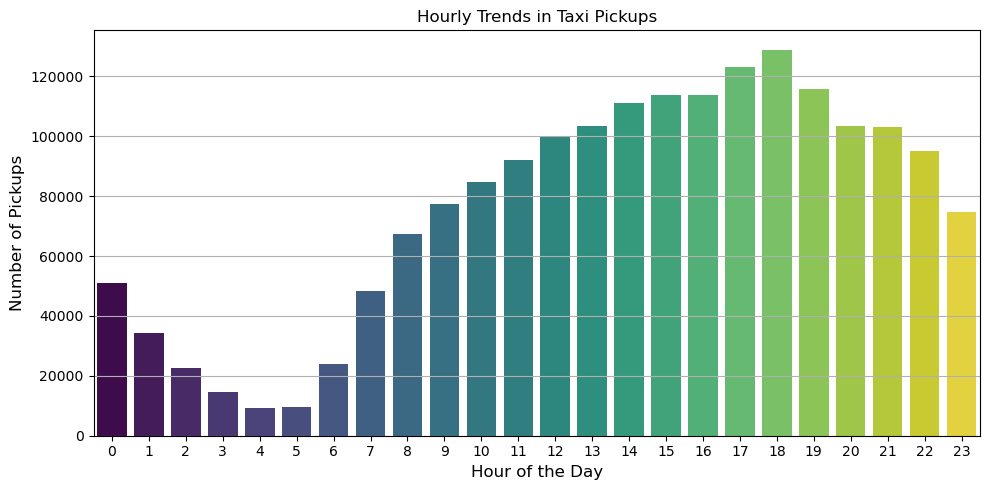

In [595]:
# Find and show the hourly trends in taxi pickups

plt.figure(figsize=(10, 5))
sns.countplot(data=df_new, x='hour', hue='hour', palette='viridis', legend=False)
plt.title("Hourly Trends in Taxi Pickups")
plt.xlabel("Hour of the Day",fontsize=12)
plt.ylabel("Number of Pickups",fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

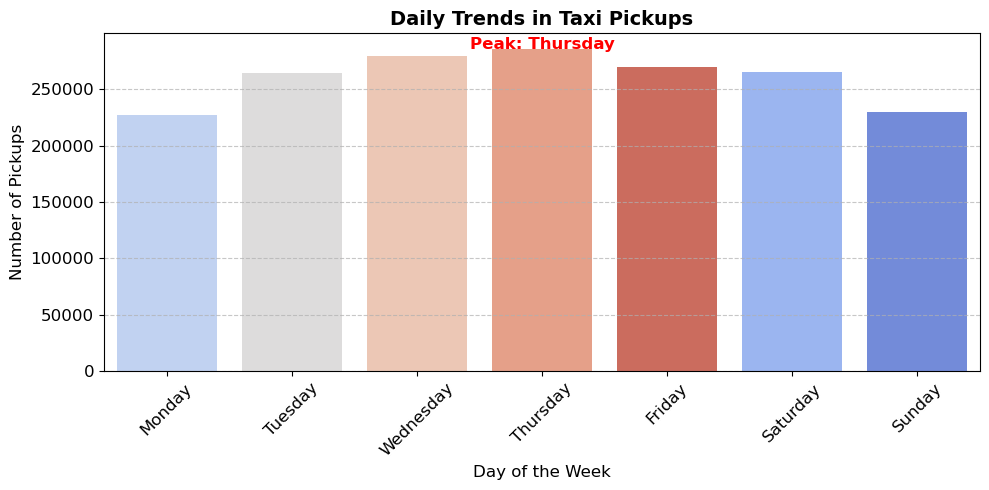

In [597]:
# Find and show the daily trends in taxi pickups (days of the week)
df_new['weekday'] = df_new['tpep_pickup_datetime'].dt.day_name()

# Define weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Set figure size
plt.figure(figsize=(10, 5))

# Create count plot with improved color palette
sns.countplot(data=df_new, x='weekday', hue='weekday', order=weekday_order, palette='coolwarm', legend=False)

# Add title and labels with better font size
plt.title("Daily Trends in Taxi Pickups", fontsize=14, fontweight='bold')
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Pickups", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add grid to Y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the highest pickup day
max_pickups = df_new['weekday'].value_counts().max()
max_day = df_new['weekday'].value_counts().idxmax()
plt.text(weekday_order.index(max_day), max_pickups, f'Peak: {max_day}', 
         ha='center', fontsize=12, fontweight='bold', color='red')

# Adjust layout
plt.tight_layout()



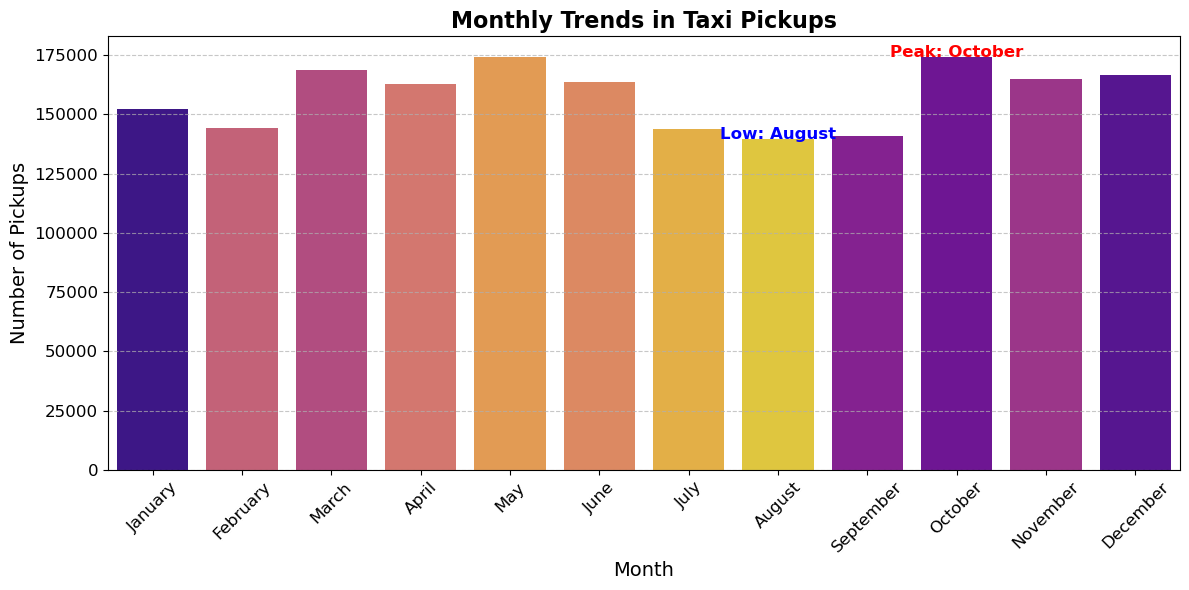

In [274]:
# Show the monthly trends in pickups

import matplotlib.pyplot as plt
import seaborn as sns

# Extract month name from pickup datetime
df_new['month'] = df_new['tpep_pickup_datetime'].dt.month_name()

# Define correct month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 6))
sns.countplot(data=df_new, x='month', hue='month', order=month_order, palette='plasma', legend=False)
plt.title("Monthly Trends in Taxi Pickups", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Pickups", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# Annotate max and min pickup months
max_pickups = df_new['month'].value_counts().max()
max_month = df_new['month'].value_counts().idxmax()
min_pickups = df_new['month'].value_counts().min()
min_month = df_new['month'].value_counts().idxmin()

plt.text(month_order.index(max_month), max_pickups, f'Peak: {max_month}', 
         ha='center', fontsize=12, fontweight='bold', color='red')

plt.text(month_order.index(min_month), min_pickups, f'Low: {min_month}', 
         ha='center', fontsize=12, fontweight='bold', color='blue')

plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [601]:
# Analyse the above parameters

columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in columns_to_check:
    zero_count = (df_new[col] == 0).sum()
    negative_count = (df_new[col] < 0).sum()
    print(f" {col} — Zeros: {zero_count}, Negatives: {negative_count}")


 fare_amount — Zeros: 556, Negatives: 0
 tip_amount — Zeros: 399783, Negatives: 0
 total_amount — Zeros: 313, Negatives: 0
 trip_distance — Zeros: 21778, Negatives: 0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [605]:
# Create a df with non zero entries for the selected parameters.
df_new = df_new[(df_new['fare_amount'] > 0) & (df_new['tip_amount'] > 0) & (df_new['total_amount'] > 0) & (df_new['trip_distance'] > 0)]



**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [607]:
# Group data by month and analyse monthly revenue
df_new['month'] = df_new['tpep_pickup_datetime'].dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_revenue = df_new.groupby('month')['total_amount'].sum().reindex(month_order)

print(monthly_revenue)


month
January      3216279.83
February     3059954.94
March        3687562.34
April        3571735.91
May          3927901.40
June         3678643.69
July         3118292.48
August       3016976.09
September    3186283.70
October      3971198.31
November     3727484.32
December     3629747.66
Name: total_amount, dtype: float64


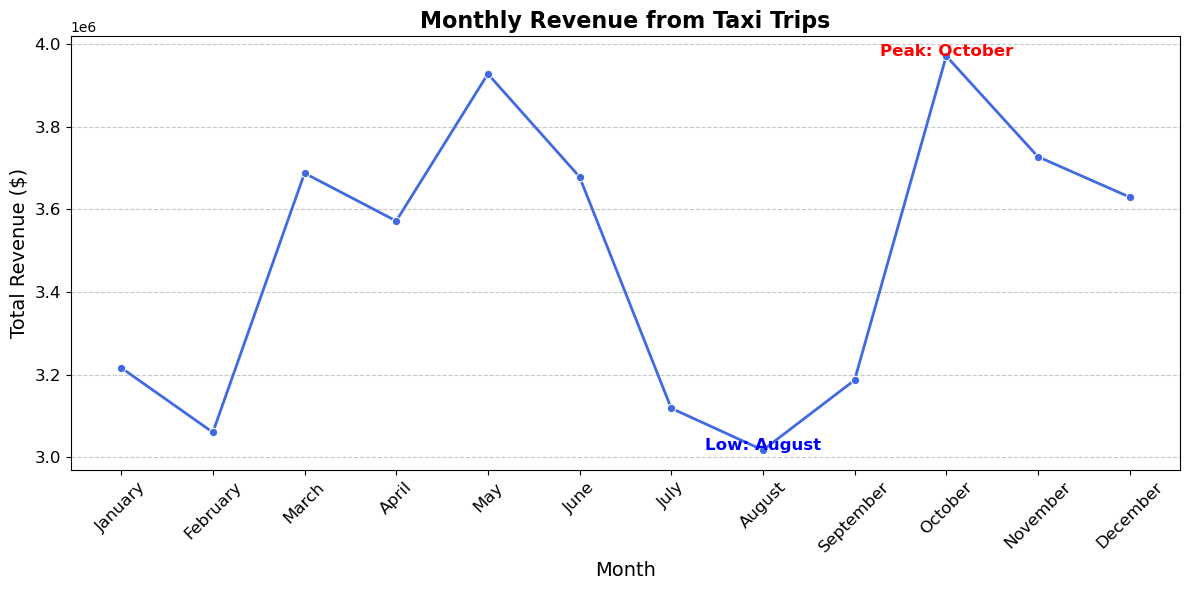

In [609]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=month_order, y=monthly_revenue, marker='o', color='royalblue', linewidth=2)
plt.title("Monthly Revenue from Taxi Trips", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Revenue ($)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate highest and lowest revenue months
max_month = monthly_revenue.idxmax()
max_revenue = monthly_revenue.max()
min_month = monthly_revenue.idxmin()
min_revenue = monthly_revenue.min()

plt.text(month_order.index(max_month), max_revenue, f'Peak: {max_month}', 
         ha='center', fontsize=12, fontweight='bold', color='red')

plt.text(month_order.index(min_month), min_revenue, f'Low: {min_month}', 
         ha='center', fontsize=12, fontweight='bold', color='blue')

plt.tight_layout()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

  quarter  Revenue Share (%)
0  2022Q4               0.00
1  2023Q1              23.84
2  2023Q2              26.75
3  2023Q3              22.30
4  2023Q4              27.11


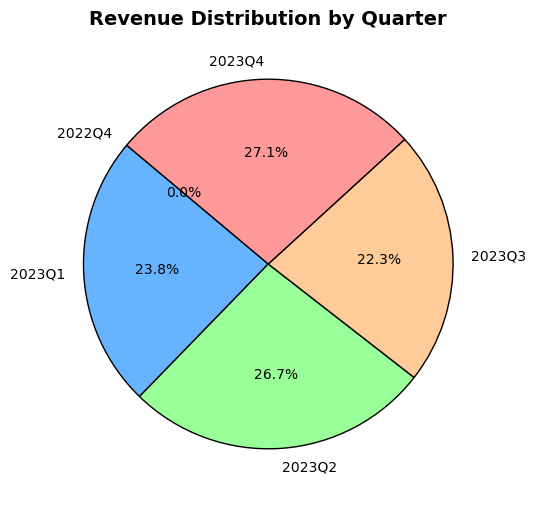

In [613]:
# Calculate proportion of each quarter
# Extract quarter from datetime
df_new['quarter'] = df_new['tpep_pickup_datetime'].dt.to_period("Q").astype(str)

# Group by quarter and calculate total revenue
quarterly_revenue = df_new.groupby('quarter')['total_amount'].sum()

# Calculate percentage share
quarterly_revenue_percentage = ((quarterly_revenue / quarterly_revenue.sum()) * 100).round(2)

# Display formatted output
quarterly_revenue_df = quarterly_revenue_percentage.reset_index().rename(
    columns={'total_amount': 'Revenue Share (%)'}
)
print(quarterly_revenue_df)

# Visualization - Pie Chart
plt.figure(figsize=(6, 6))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
plt.pie(
    quarterly_revenue, labels=quarterly_revenue.index, 
    autopct='%1.1f%%', startangle=140, colors=colors, 
    wedgeprops={'edgecolor': 'black'}
)

# Add title
plt.title("Revenue Distribution by Quarter", fontsize=14, fontweight='bold')
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

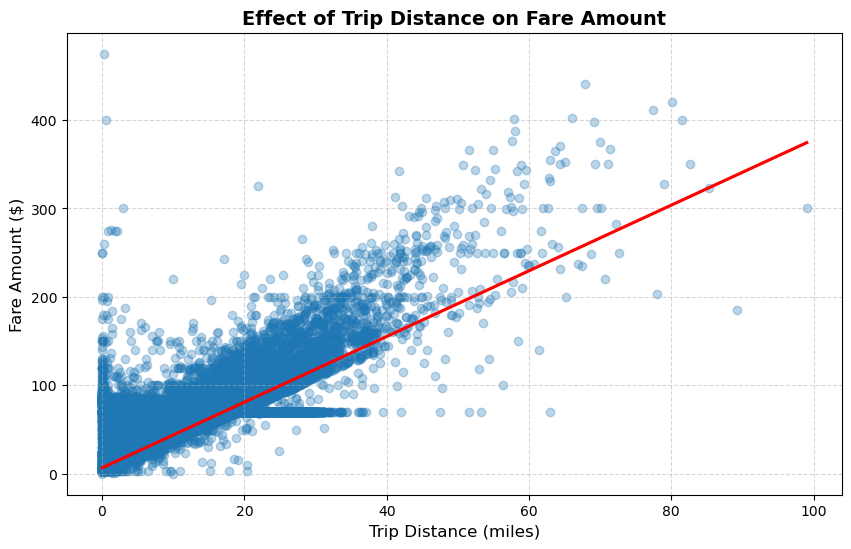

In [615]:
# Show how trip fare is affected by distance
df_filtered = df_new[(df_new['trip_distance'] > 0) & (df_new['fare_amount'] > 0) & 
                     (df_new['trip_distance'] < 100) & (df_new['fare_amount'] < 500)]

plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_filtered, x='trip_distance', y='fare_amount', 
    scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'}
)

# Add title and labels
plt.title("Effect of Trip Distance on Fare Amount", fontsize=14, fontweight='bold')
plt.xlabel("Trip Distance (miles)", fontsize=12)
plt.ylabel("Fare Amount ($)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

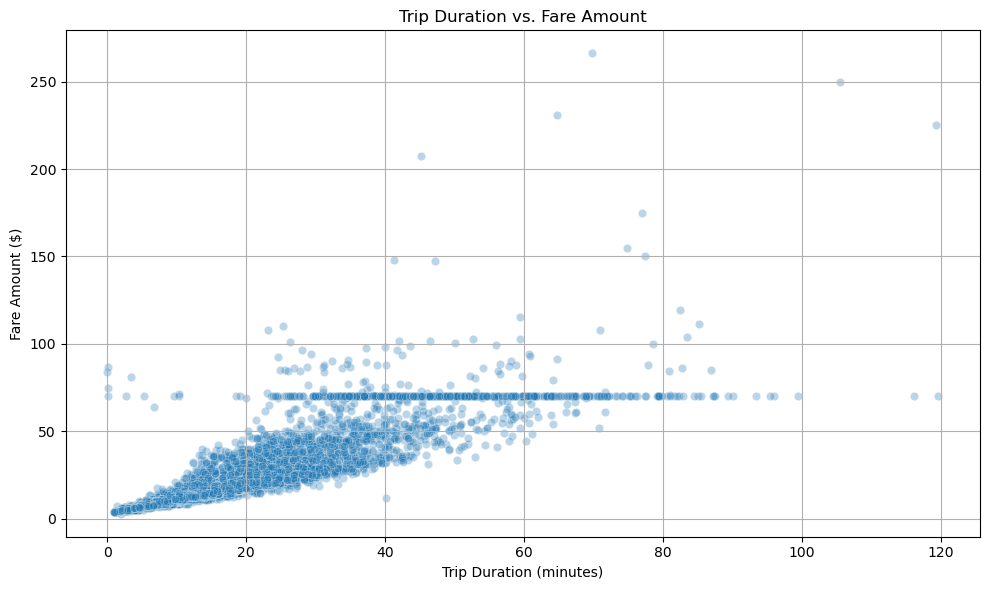

In [617]:
# Show relationship between fare and trip duration
# Calculate trip duration in minutes
df_new['trip_duration_min'] = (df_new['tpep_dropoff_datetime'] - df_new['tpep_pickup_datetime']).dt.total_seconds() / 60
# Filter unrealistic durations
df_duration_fare = df_new[(df_new['trip_duration_min'] > 0) & (df_new['trip_duration_min'] <= 180)].copy()
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_duration_fare.sample(10000, random_state=42),
    x='trip_duration_min',
    y='fare_amount',
    alpha=0.3
)

plt.title("Trip Duration vs. Fare Amount")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.tight_layout()
plt.show()



Correlation between Fare Amount and Passenger Count: 0.04


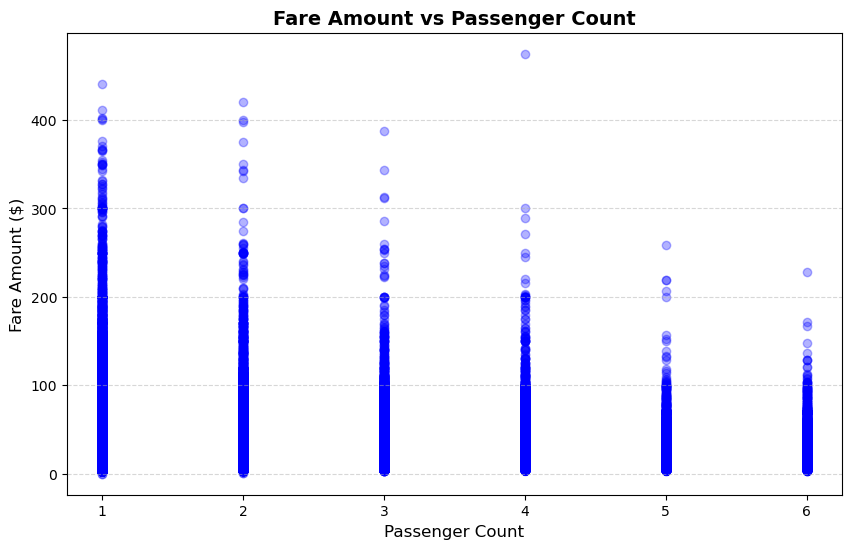

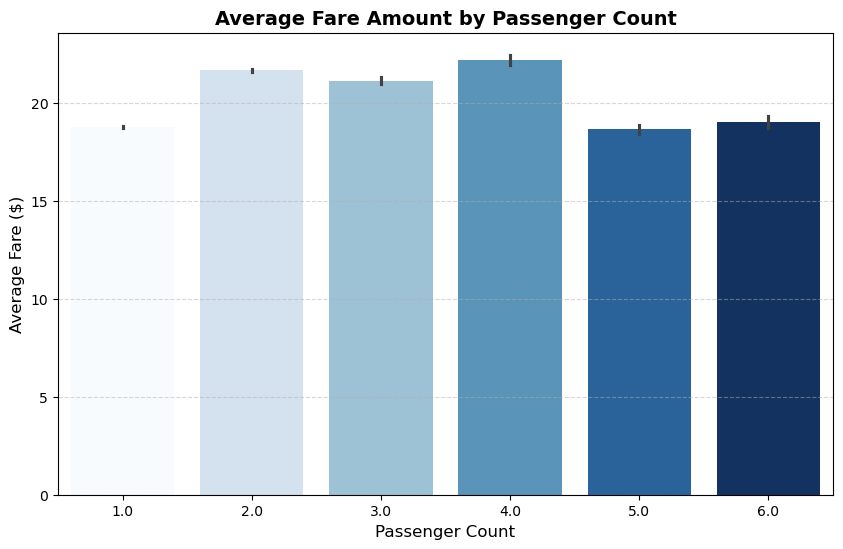

In [619]:
# Show relationship between fare and number of passengers
# Remove extreme fare values for better visualization
df_filtered = df_new[(df_new['fare_amount'] > 0) & (df_new['fare_amount'] < 500)]

# Compute correlation
corr_value = df_filtered[['fare_amount', 'passenger_count']].corr().iloc[0, 1]
print(f"Correlation between Fare Amount and Passenger Count: {corr_value:.2f}")

# Scatter Plot - Passenger Count vs Fare Amount
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['passenger_count'], df_filtered['fare_amount'], alpha=0.3, color='blue')

# Titles and labels
plt.title("Fare Amount vs Passenger Count", fontsize=14, fontweight='bold')
plt.xlabel("Passenger Count", fontsize=12)
plt.ylabel("Fare Amount ($)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show plot for Average Fare Amount by Passenger Count
plt.show()

# Bar Plot - Mean Fare per Passenger Count
plt.figure(figsize=(10, 6))
sns.barplot(data=df_filtered, x='passenger_count', y='fare_amount',hue='passenger_count', estimator=np.mean, palette='Blues',legend=False)

# Titles and labels
plt.title("Average Fare Amount by Passenger Count", fontsize=14, fontweight='bold')
plt.xlabel("Passenger Count", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show plot
plt.show()



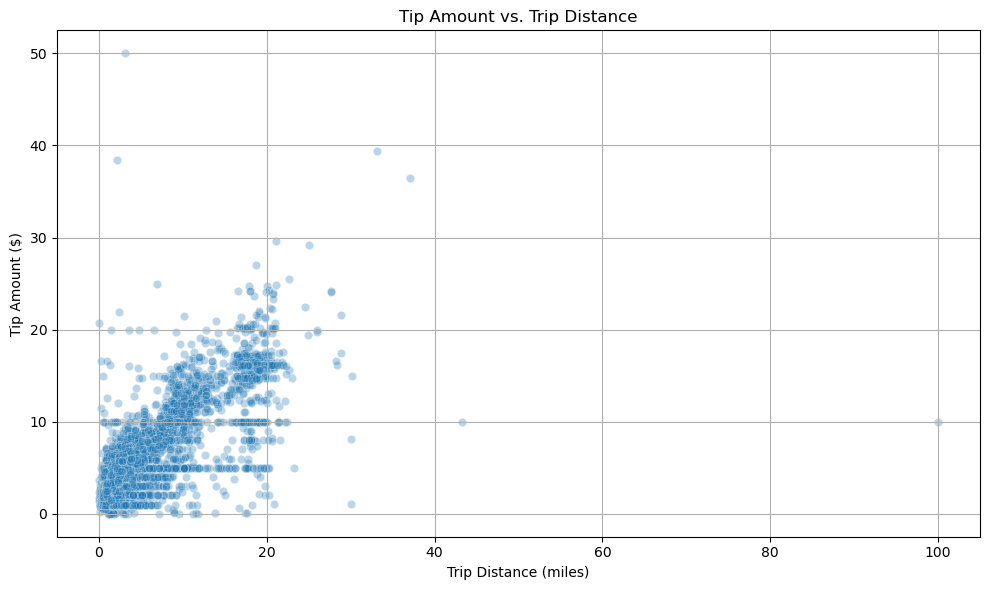

Correlation between trip distance and tip amount: 0.79


In [313]:
# Show relationship between tip and trip distance
df_tip_distance = df_new[(df_new['tip_amount'] > 0) & (df_new['trip_distance'] > 0)].copy()
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_tip_distance.sample(10000, random_state=42),
    x='trip_distance',
    y='tip_amount',
    alpha=0.3
)
plt.title("Tip Amount vs. Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.grid(True)
plt.tight_layout()
plt.show()
correlation = df_tip_distance['trip_distance'].corr(df_tip_distance['tip_amount'])
print(f"Correlation between trip distance and tip amount: {correlation:.2f}")



**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

Payment Type Distribution:
payment_type
Credit card    1412872
Cash                23
No charge            7
Dispute             16
Name: count, dtype: int64


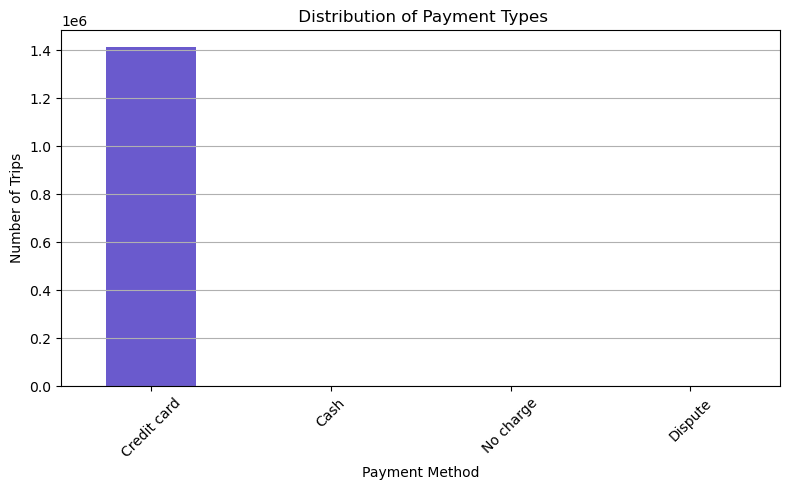

In [621]:
# Analyse the distribution of different payment types (payment_type).

# Count of each payment type

# Calculate value counts
payment_counts = df_new['payment_type'].value_counts().sort_index()

# Step 2: Define mapping
payment_labels = {
    1: "Credit card",
    2: "Cash",
    3: "No charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided trip"
}

# Map integer index to labels (make sure index is int)
payment_counts.index = payment_counts.index.astype(int).map(payment_labels)

# Display result
print("Payment Type Distribution:")
print(payment_counts)
plt.figure(figsize=(8, 5))
payment_counts.plot(kind='bar', color='slateblue')

plt.title(" Distribution of Payment Types")
plt.xlabel("Payment Method")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [328]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [623]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file(r'C:\Users\Shagufa Nausheen\Downloads\notebook\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones\taxi_zones.shp')
# read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

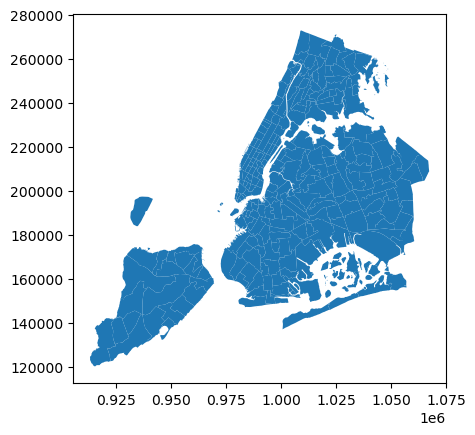

In [625]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [627]:
# Merge zones and trip records using locationID and PULocationID
# Renaming columns for merging
zones_new = zones.rename(columns={'LocationID': 'PULocationID'})

# Merge zones with trip on PULocationID
pickup_new = df_new.merge(zones_new, on='PULocationID', how='left')

# Verify merged data
print(pickup_new[['PULocationID', 'zone', 'borough']].head())


   PULocationID                       zone    borough
0           161             Midtown Center  Manhattan
1           246  West Chelsea/Hudson Yards  Manhattan
2            79               East Village  Manhattan
3            79               East Village  Manhattan
4           132                JFK Airport     Queens


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [629]:
# Group data by location and calculate the number of trips

# Calculating pickup count by grouping on PULocationID
pickup_counts = pickup_new.groupby('PULocationID').size().reset_index(name='trip_count')

# Display the result
print(pickup_counts.head())


   PULocationID  trip_count
0             1          35
1             2           2
2             4        1403
3             6           1
4             7         253


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [631]:
# Merge trip counts back to the zones GeoDataFrame
zones_with_trip_count = zones.merge(pickup_counts, left_on='LocationID', right_on='PULocationID', how='left')

# Fill NaN with 0
zones_with_trip_count['trip_count'] = zones_with_counts['trip_count'].fillna(0).astype(int)
zones_with_trip_count.head()



OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  trip_count  
0           1.0         218  
1           2.0           2  
2           NaN          44  
3           4.0        2356  
4           NaN          13

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

<Figure size 1200x1000 with 0 Axes>

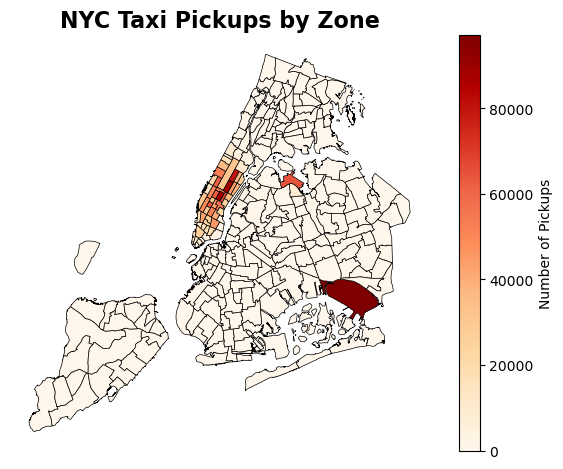

In [633]:
# Define figure and axis
plt.figure(figsize=(12, 10))
zones_with_trip_count.plot(
    column='trip_count',
    cmap='OrRd',
    legend=True,
    edgecolor='black',
    linewidth=0.5,
    legend_kwds={'label': "Number of Pickups"},
)

# Plot the map and display it
plt.title("NYC Taxi Pickups by Zone", fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

In [635]:
# can you try displaying the zones DF sorted by the number of trips?
sorted_zones = zones_with_trip_count.sort_values(by='trip_count', ascending=False)
sorted_zones.head(20)


OBJECTID  Shape_Leng  Shape_Area                          zone  \
131       132    0.245479    0.002038                   JFK Airport   
236       237    0.042213    0.000096         Upper East Side South   
160       161    0.035804    0.000072                Midtown Center   
235       236    0.044252    0.000103         Upper East Side North   
161       162    0.035270    0.000048                  Midtown East   
137       138    0.107467    0.000537             LaGuardia Airport   
185       186    0.024696    0.000037  Penn Station/Madison Sq West   
229       230    0.031028    0.000056     Times Sq/Theatre District   
141       142    0.038176    0.000076           Lincoln Square East   
169       170    0.045769    0.000074                   Murray Hill   
162       163    0.034177    0.000041                 Midtown North   
238       239    0.063626    0.000205         Upper West Side South   
233       234    0.036072    0.000073                      Union Sq   
47         48    0.043747    0.000094                  Clinton East   
67         68    0.049337    0.000111                  East Chelsea   
78         79    0.042625    0.000108                  East Village   
140       141    0.041514    0.000077               Lenox Hill West   
163       164    0.035772    0.000056                 Midtown South   
248       249    0.036384    0.000072                  West Village   
106       107    0.038041    0.000075                      Gramercy   

     LocationID    borough                                           geometry  \
131         132     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
236         237  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160         161  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235         236  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
161         162  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
137         138     Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...   
185         186  Manhattan  POLYGON ((986752.603 210853.699, 986627.863 21...   
229         230  Manhattan  POLYGON ((988786.877 214532.094, 988650.277 21...   
141         142  Manhattan  POLYGON ((989380.305 218980.247, 989359.803 21...   
169         170  Manhattan  POLYGON ((991999.299 210994.739, 991972.635 21...   
162         163  Manhattan  POLYGON ((989412.663 219020.943, 990045.841 21...   
238         239  Manhattan  POLYGON ((991168.979 226252.992, 991955.565 22...   
233         234  Manhattan  POLYGON ((987029.847 207022.299, 987048.27 206...   
47           48  Manhattan  POLYGON ((986694.313 214463.846, 986568.184 21...   
67           68  Manhattan  POLYGON ((983690.405 209040.369, 983550.612 20...   
78           79  Manhattan  POLYGON ((988746.067 202151.955, 988733.885 20...   
140         141  Manhattan  POLYGON ((994839.073 216123.698, 994786.74 216...   
163         164  Manhattan  POLYGON ((988787.425 210315.593, 988662.868 21...   
248         249  Manhattan  POLYGON ((983555.319 204876.901, 983469.158 20...   
106         107  Manhattan  POLYGON ((989131.643 205749.904, 989084.531 20...   

     PULocationID  trip_count  
131         132.0       97047  
236         237.0       88610  
160         161.0       87590  
235         236.0       79756  
161         162.0       66712  
137         138.0       64449  
185         186.0       64318  
229         230.0       62672  
141         142.0       62664  
169         170.0       55933  
162         163.0       54840  
238         239.0       52694  
233         234.0       50786  
47           48.0       50325  
67           68.0       49301  
78           79.0       45321  
140         141.0       44931  
163         164.0       44104  
248         249.0       41951  
106         107.0       39874

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

🚕 Slowest Routes by Hour (with Zone Names):
    hour                                              route  avg_speed
0      0                                                NaN   1.865285
1      1                     Clinton East → Pelham Bay Park   0.127919
2      2                            Murray Hill → Hudson Sq   0.131573
3      3                                  Seaport → Seaport   2.117647
4      4                        Midtown East → Midtown East   0.064780
5      5         TriBeCa/Civic Center → Crown Heights North   0.202373
6      6                  East Elmhurst → LaGuardia Airport   0.085750
7      7                        Battery Park City → Seaport   2.319907
8      8             Two Bridges/Seward Park → East Chelsea   0.207431
9      9                   Upper West Side North → Flushing   0.842121
10    10                              Chinatown → Chinatown   0.059484
11    11  Queensbridge/Ravenswood → Queensbridge/Ravenswood   0.150000
12    12       Greenwich Village 

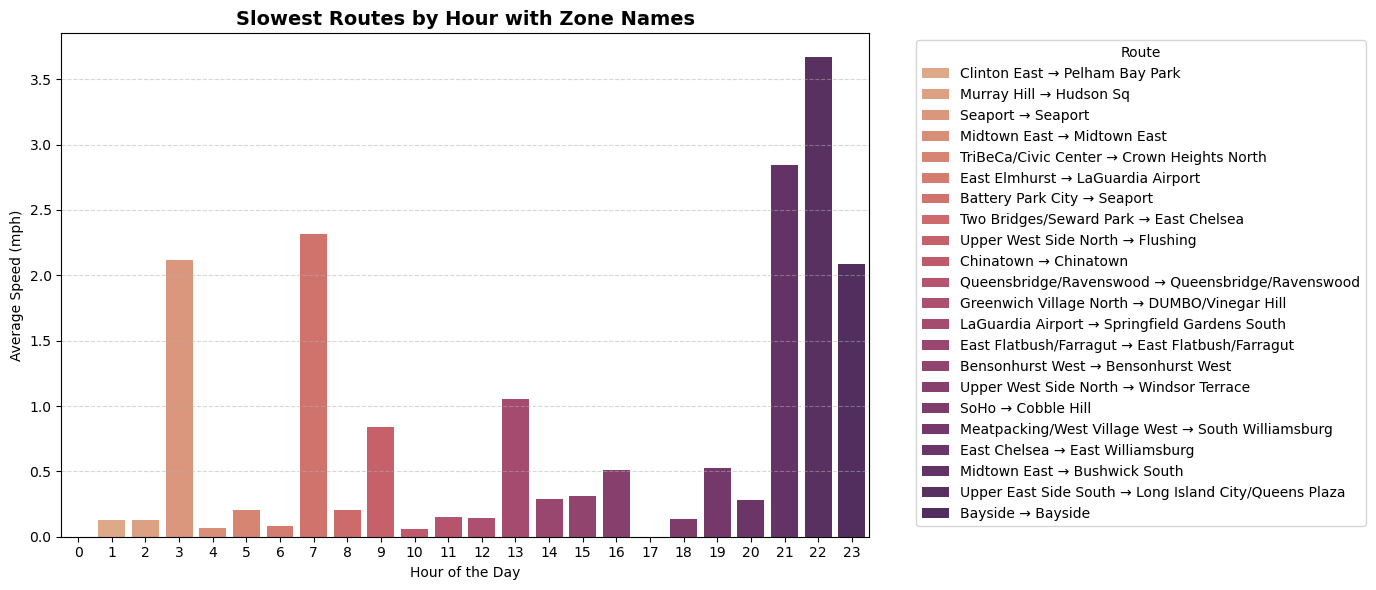

In [637]:
# Find routes which have the slowest speeds at different times of the day
df_new['tpep_pickup_datetime'] = pd.to_datetime(df_new['tpep_pickup_datetime'])
df_new['tpep_dropoff_datetime'] = pd.to_datetime(df_new['tpep_dropoff_datetime'])

# Calculate trip duration in hours
df_new['trip_duration_hours'] = (df_new['tpep_dropoff_datetime'] - df_new['tpep_pickup_datetime']).dt.total_seconds() / 3600

# Avoid division by zero or negative durations
df_new = df_new[(df_new['trip_duration_hours'] > 0) & (df_new['trip_distance'] > 0)]

# Calculate speed in mph
df_new['avg_speed'] = df_new['trip_distance'] / df_new['trip_duration_hours']

# Extract hour from pickup time
df_new['hour'] = df_new['tpep_pickup_datetime'].dt.hour

# Group by hour, pickup and dropoff to find average speed
route_speeds = df_new.groupby(['hour', 'PULocationID', 'DOLocationID'])['avg_speed'].mean().reset_index()

# Get the slowest route per hour
slowest_routes_by_hour = route_speeds.loc[route_speeds.groupby('hour')['avg_speed'].idxmin()]

# Sort by hour for better readability
slowest_routes_by_hour = slowest_routes_by_hour.sort_values('hour')

slowest_routes_by_hour = slowest_routes_by_hour.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')
slowest_routes_by_hour = slowest_routes_by_hour.rename(columns={'zone': 'pickup_zone'})
slowest_routes_by_hour = slowest_routes_by_hour.merge(zones, left_on='DOLocationID', right_on='LocationID', how='left')
slowest_routes_by_hour = slowest_routes_by_hour.rename(columns={'zone': 'dropoff_zone'})

# removing additional colums
slowest_routes_by_hour = slowest_routes_by_hour[['hour', 'pickup_zone', 'dropoff_zone', 'avg_speed']]
slowest_routes_by_hour['route'] = slowest_routes_by_hour['pickup_zone'] + ' → ' + slowest_routes_by_hour['dropoff_zone']

# --- Step 10: Display result ---
print("🚕 Slowest Routes by Hour (with Zone Names):")
print(slowest_routes_by_hour[['hour', 'route', 'avg_speed']])

# Plot a graph to show slowest routes with zone

# Sort by hour
slowest_routes_by_hour = slowest_routes_by_hour.sort_values('hour')

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=slowest_routes_by_hour, x='hour', y='avg_speed', hue='route', dodge=False, palette='flare')

plt.title("Slowest Routes by Hour with Zone Names", fontsize=14, fontweight='bold')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Speed (mph)")
plt.legend(title='Route', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

Busiest Hour: 18:00 with 103056 trips.


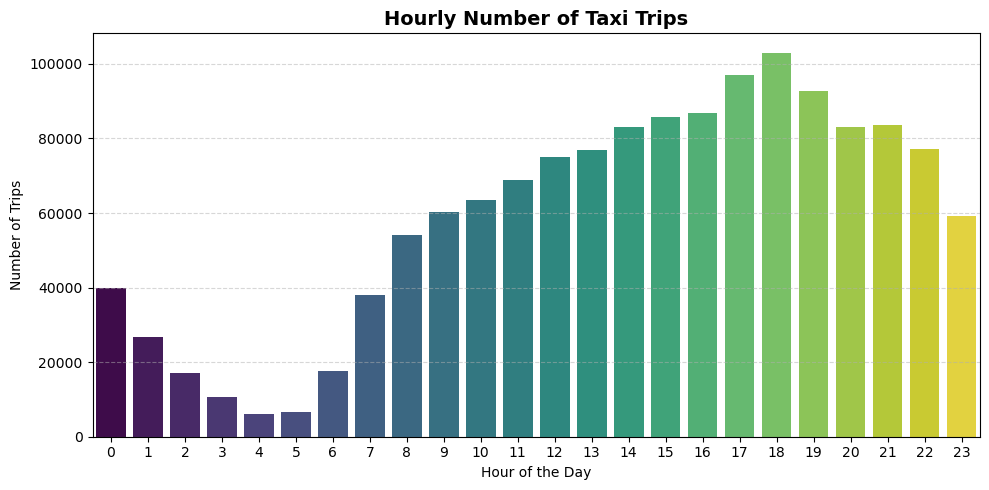

In [639]:
# Visualise the number of trips per hour and find the busiest hour

# Count number of trips per hour
hourly_trip_counts = df_new['hour'].value_counts().sort_index()

# Find the busiest hour
busiest_hour = hourly_trip_counts.idxmax()
busiest_trip_count = hourly_trip_counts.max()

# Display busiest hour
print(f"Busiest Hour: {busiest_hour}:00 with {busiest_trip_count} trips.")

# Plot the trip counts per hour
plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_trip_counts.index, y=hourly_trip_counts.values, hue=hourly_trip_counts.index, palette='viridis', legend=False)
plt.title("Hourly Number of Taxi Trips", fontsize=14, fontweight='bold')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [641]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05

# Count number of trips per hour in the sample
hourly_trip_counts = df_new['hour'].value_counts().sort_values(ascending=False)

#Get top 5 busiest hours from the sample
top_5_sample = hourly_trip_counts.head(5)

# Scale up using sampling fraction
top_5_estimated = (top_5_sample / sample_fraction).astype(int)

# Display estimated trip counts
print("Top 5 Busiest Hours (Estimated Total Trips):")
print(top_5_estimated)




Top 5 Busiest Hours (Estimated Total Trips):
hour
18    2061120
17    1939020
19    1854680
16    1736620
15    1713320
Name: count, dtype: int32


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

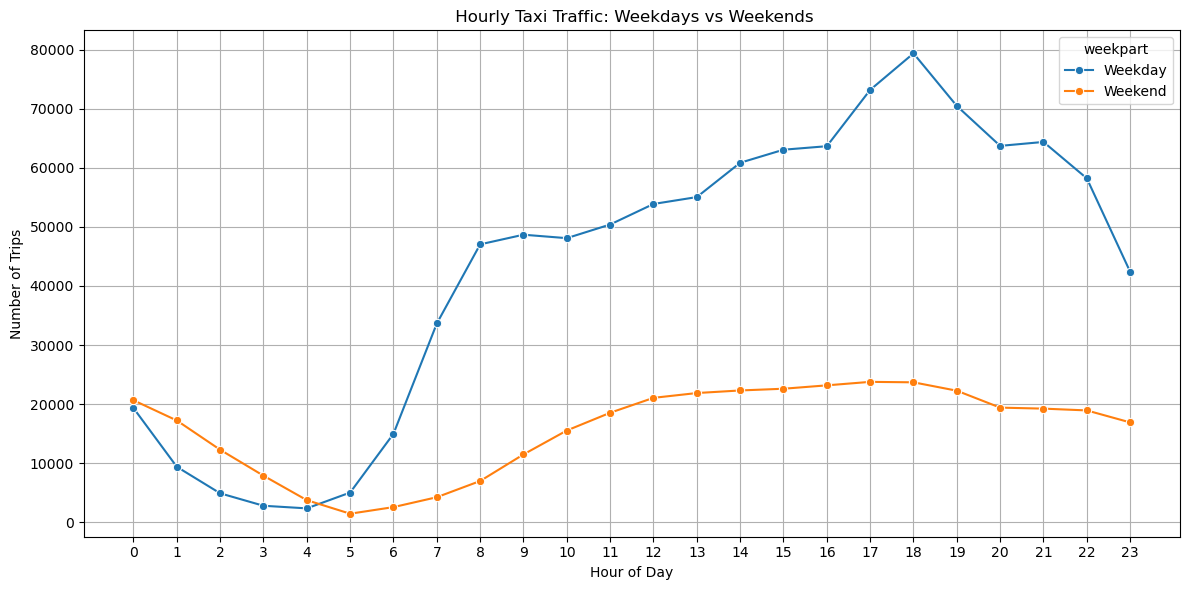

In [643]:
# Compare traffic trends for the week days and weekends
# Extract day name
df_new['weekday'] = df_new['tpep_pickup_datetime'].dt.day_name()

# Create a new column to classify weekday/weekend
df_new['weekpart'] = df_new['weekday'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
# Count number of trips by hour and weekpart
trips_by_hour_weekpart = df_new.groupby(['hour', 'weekpart']).size().reset_index(name='trip_count')
plt.figure(figsize=(12, 6))
sns.lineplot(data=trips_by_hour_weekpart, x='hour', y='trip_count', hue='weekpart', marker='o')

plt.title(" Hourly Taxi Traffic: Weekdays vs Weekends")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

 Top 10 Pickup Zones:
pickup_zone
Upper East Side South           69856
Midtown Center                  67734
Upper East Side North           63695
JFK Airport                     63690
Midtown East                    52689
LaGuardia Airport               51654
Lincoln Square East             48921
Penn Station/Madison Sq West    48585
Times Sq/Theatre District       44372
Murray Hill                     43162
Name: count, dtype: int64
 Top 10 Dropoff Zones:
dropoff_zone
Upper East Side North        67477
Upper East Side South        62506
Midtown Center               55372
Murray Hill                  43200
Upper West Side South        42709
Lincoln Square East          41487
Midtown East                 41353
Lenox Hill West              39772
Times Sq/Theatre District    39311
East Chelsea                 36098
Name: count, dtype: int64


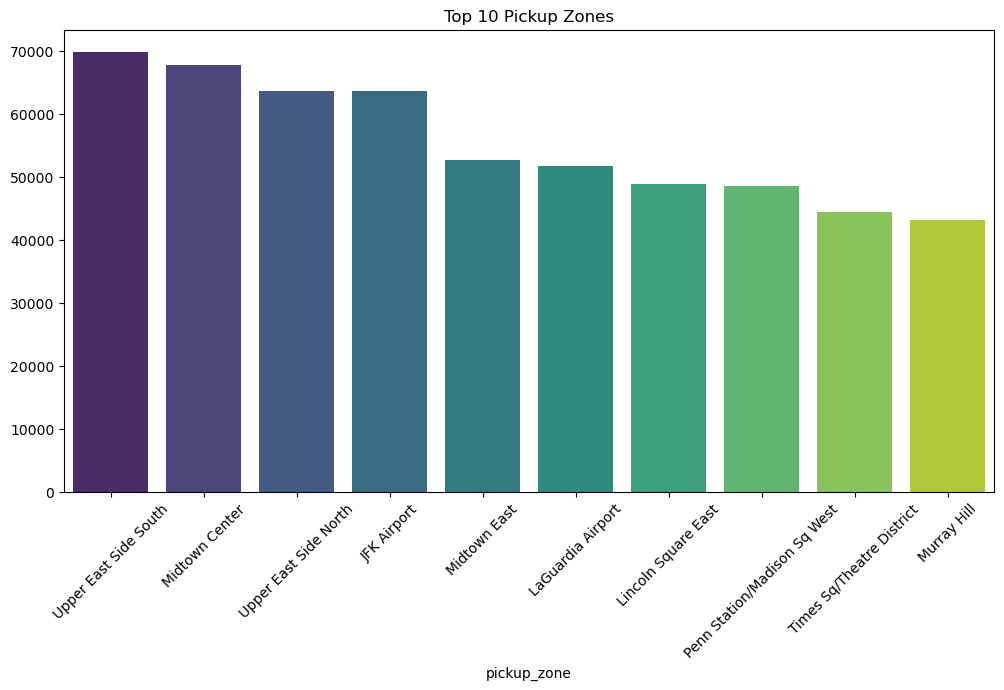

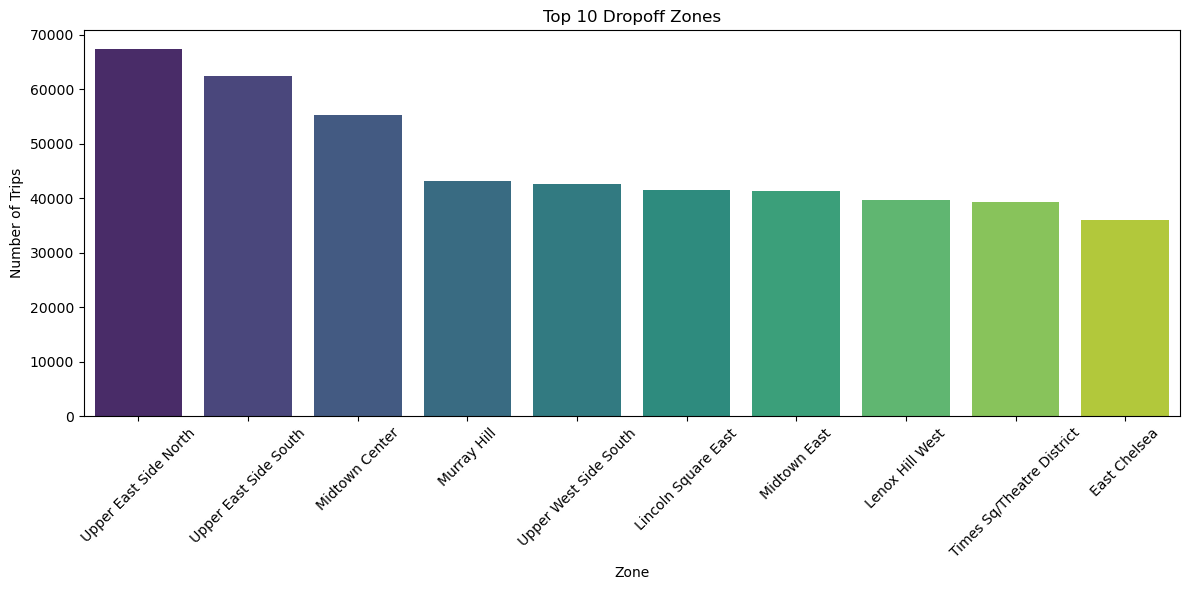

In [645]:
# Find top 10 pickup and dropoff zones
# Rename for clarity
zones_pickup = zones.rename(columns={'LocationID': 'PULocationID', 'zone': 'pickup_zone'})
zones_dropoff = zones.rename(columns={'LocationID': 'DOLocationID', 'zone': 'dropoff_zone'})

# Merge pickup zone
df_zones = df_new.merge(zones_pickup[['PULocationID', 'pickup_zone']], on='PULocationID', how='left')

# Merge dropoff zone
df_zones = df_zones.merge(zones_dropoff[['DOLocationID', 'dropoff_zone']], on='DOLocationID', how='left')
top_pickup_zones = df_zones['pickup_zone'].value_counts().head(10)
print(" Top 10 Pickup Zones:")
print(top_pickup_zones)
top_dropoff_zones = df_zones['dropoff_zone'].value_counts().head(10)
print(" Top 10 Dropoff Zones:")
print(top_dropoff_zones)
#plot pickup zone
plt.figure (figsize=(12, 6))
sns.barplot(x=top_pickup_zones.index, y=top_pickup_zones.values,hue=top_pickup_zones.index, palette='viridis',legend=False)
plt.xticks(rotation=45)
plt.title("Top 10 Pickup Zones")
plt.xlabel
#plot dropoff zones
plt.figure(figsize=(12, 6))
sns.barplot(x=top_dropoff_zones.index, y=top_dropoff_zones.values, hue=top_dropoff_zones.index, palette='viridis',legend=False)
plt.xticks(rotation=45)
plt.title("Top 10 Dropoff Zones")
plt.xlabel("Zone")
plt.ylabel("Number of Trips")
plt.tight_layout()
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [647]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Count pickups and dropoffs by zone ID
pickup_counts = df_new['PULocationID'].value_counts().rename('pickup_count')
dropoff_counts = df_new['DOLocationID'].value_counts().rename('dropoff_count')

# Combine both into one DataFrame
zone_activity = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)

# Compute pickup/dropoff ratio (avoid division by zero)
zone_activity['pickup_dropoff_ratio'] = zone_activity['pickup_count'] / zone_activity['dropoff_count'].replace(0, 1)

# Map zone names if available
if 'LocationID' in zones.columns and 'zone' in zones.columns:
    # Ensure LocationID is unique in zone mapping
    zone_mapping = zones.drop_duplicates(subset='LocationID').set_index('LocationID')['zone']
    zone_activity['zone'] = zone_activity.index.map(zone_mapping)

# Sort and extract top/bottom 10
top_10_ratios = zone_activity.sort_values('pickup_dropoff_ratio', ascending=False).head(10)
bottom_10_ratios = zone_activity.sort_values('pickup_dropoff_ratio').head(10)

# Show results
print("Top 10 Pickup/Dropoff Ratios:")
print(top_10_ratios[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

print("\n Bottom 10 Pickup/Dropoff Ratios:")
print(bottom_10_ratios[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])




Top 10 Pickup/Dropoff Ratios:
                                 zone  pickup_count  dropoff_count  \
70                      East Elmhurst        6402.0          462.0   
132                       JFK Airport       63641.0        13430.0   
138                 LaGuardia Airport       51621.0        17977.0   
2                         Jamaica Bay           2.0            0.0   
199                     Rikers Island           2.0            0.0   
207  Saint Michaels Cemetery/Woodside          12.0            7.0   
186      Penn Station/Madison Sq West       48581.0        29444.0   
43                       Central Park       23916.0        17234.0   
114           Greenwich Village South       19819.0        14339.0   
249                      West Village       33894.0        25469.0   

     pickup_dropoff_ratio  
70              13.857143  
132              4.738719  
138              2.871502  
2                2.000000  
199              2.000000  
207              1.714286  
186

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

Top 10 Night Hour Pickup Zones:
pickup_zone
East Village                    12844
West Village                    10491
JFK Airport                      9520
Clinton East                     8060
Lower East Side                  8000
Greenwich Village South          7282
Times Sq/Theatre District        5881
Penn Station/Madison Sq West     5355
Midtown South                    4784
LaGuardia Airport                4691
Name: count, dtype: int64

 Top 10 Night Hour Dropoff Zones:
dropoff_zone
East Village             6754
Clinton East             5106
Murray Hill              5044
Gramercy                 4851
East Chelsea             4503
Lenox Hill West          4479
Yorkville West           4229
West Village             4133
Upper West Side South    3730
Upper East Side North    3688
Name: count, dtype: int64


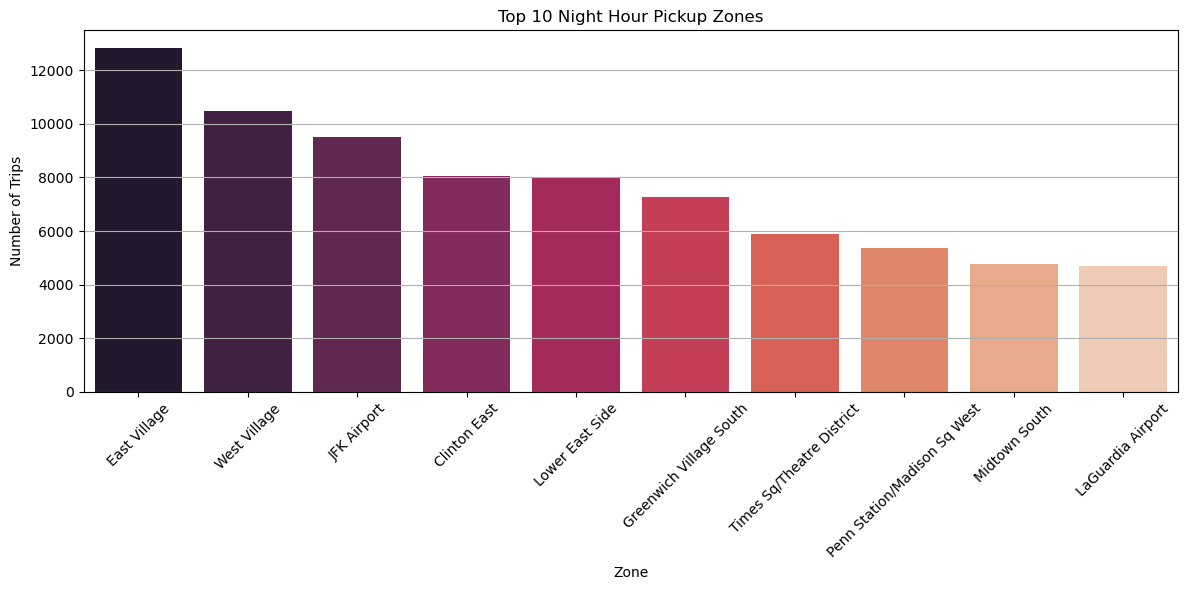

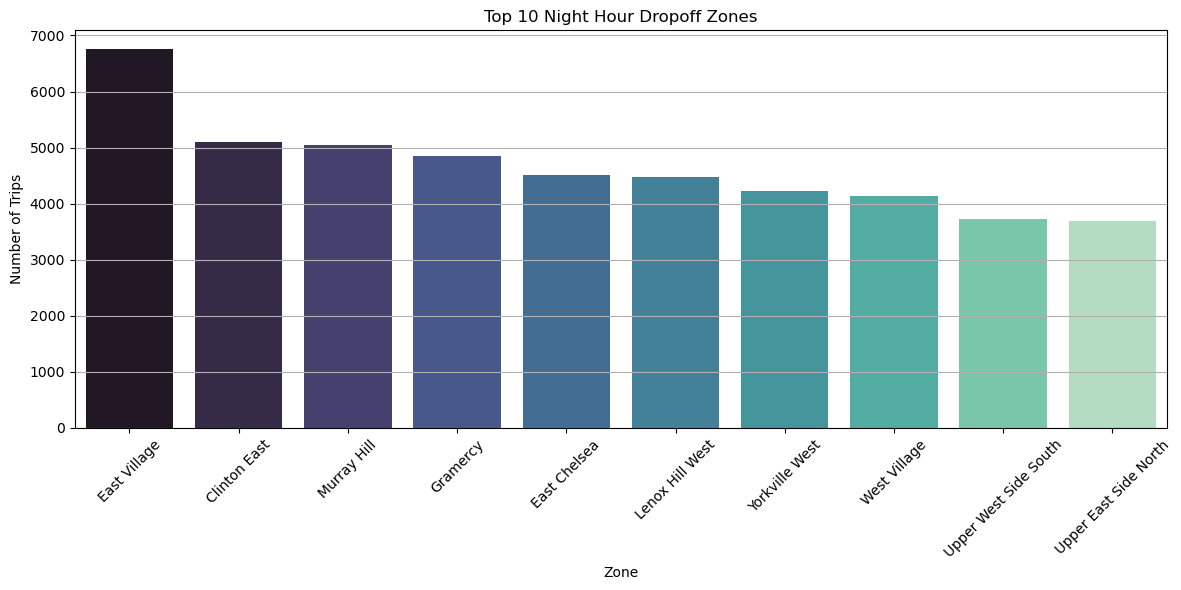

In [649]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones


# Extract hour
df_new['hour'] = df_new['tpep_pickup_datetime'].dt.hour

# Filter for night trips (from 11 PM to 5 AM)
night_trips = df_new[(df_new['hour'] >= 23) | (df_new['hour'] <= 5)]
# Reuse or redefine zone mappings
zones_pickup = zones.rename(columns={'LocationID': 'PULocationID', 'zone': 'pickup_zone'})
zones_dropoff = zones.rename(columns={'LocationID': 'DOLocationID', 'zone': 'dropoff_zone'})

# Merging pickup and dropoff zone names into night_trips
night_trips = night_trips.merge(zones_pickup[['PULocationID', 'pickup_zone']], on='PULocationID', how='left')
night_trips = night_trips.merge(zones_dropoff[['DOLocationID', 'dropoff_zone']], on='DOLocationID', how='left')
# Counting pickups
top_night_pickups = night_trips['pickup_zone'].value_counts().head(10)

# Counting dropoffs
top_night_dropoffs = night_trips['dropoff_zone'].value_counts().head(10)

# Displaying
print("Top 10 Night Hour Pickup Zones:")
print(top_night_pickups)

print("\n Top 10 Night Hour Dropoff Zones:")
print(top_night_dropoffs)
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_night_pickups.index, y=top_night_pickups.values, palette='rocket', hue=top_night_pickups.index, legend=False)

plt.title("Top 10 Night Hour Pickup Zones")
plt.xlabel("Zone")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=top_night_dropoffs.index, y=top_night_dropoffs.values, palette='mako', hue=top_night_dropoffs.index, legend=False)

plt.title("Top 10 Night Hour Dropoff Zones")
plt.xlabel("Zone")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

Nighttime Revenue Share (11 PM - 5 AM): 11.93%
Daytime Revenue Share (6 AM - 10 PM): 88.07%


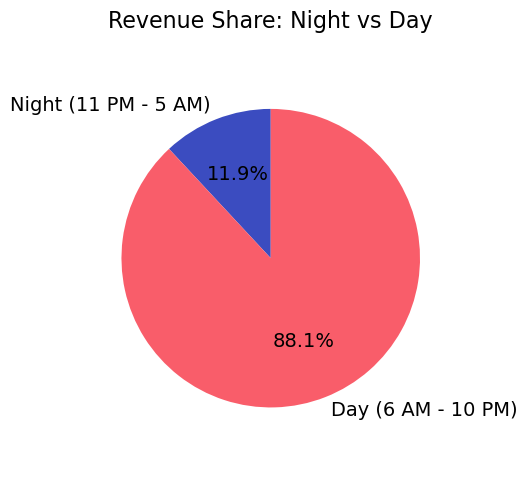

In [651]:
# Filter for night hours (11 PM to 5 AM)

df_new['hour'] = df_new['tpep_pickup_datetime'].dt.hour

# Define nighttime: 11 PM to 5 AM
night_df = df_new[(df_new['hour'] >= 23) | (df_new['hour'] <= 5)]

# Define daytime: 6 AM to 10 PM
day_df = df_new[(df_new['hour'] >= 6) & (df_new['hour'] <= 22)]

# Calculate total revenue for each
night_revenue = night_df['total_amount'].sum()
day_revenue = day_df['total_amount'].sum()
total_revenue = night_revenue + day_revenue

# Calculate revenue share
night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

# Print results
print(f"Nighttime Revenue Share (11 PM - 5 AM): {night_share:.2f}%")
print(f"Daytime Revenue Share (6 AM - 10 PM): {day_share:.2f}%")

# Plotting the pie chart
labels = ['Night (11 PM - 5 AM)', 'Day (6 AM - 10 PM)']
sizes = [night_share, day_share]
colors = ['#3b4cc0', '#f95d6a']

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=colors, textprops={'fontsize': 14})
plt.title('Revenue Share: Night vs Day', fontsize=16)
plt.axis('equal')  # Equal aspect ratio for a perfect circle
plt.tight_layout()
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

   Passenger Count  Avg Fare per Mile per Passenger ($)
0              1.0                             9.259998
1              2.0                             4.991055
2              3.0                             3.328711
3              4.0                             3.933123
4              5.0                             1.589161
5              6.0                             1.284684


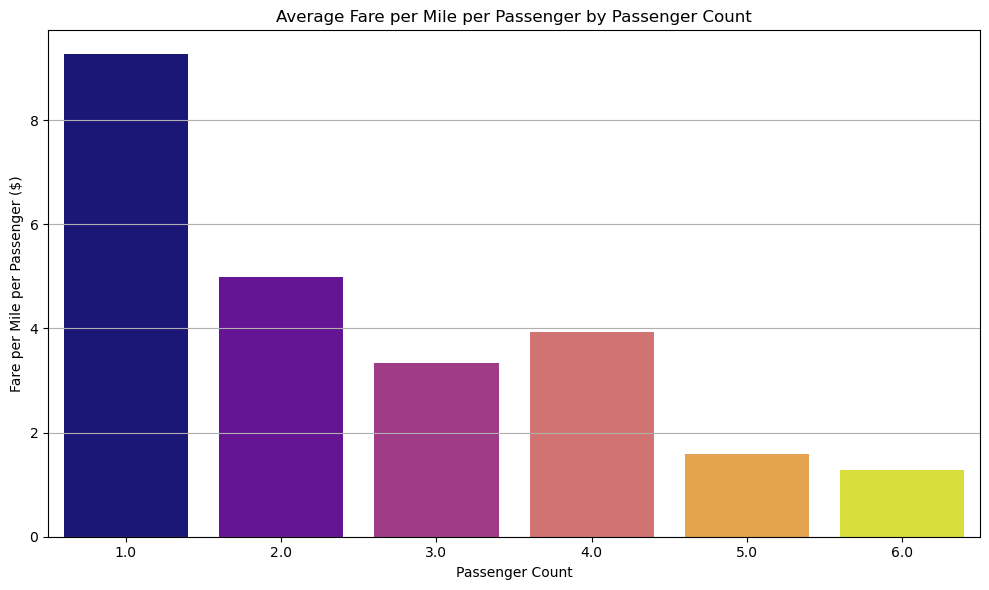

In [653]:
# Analyse the fare per mile per passenger for different passenger counts

df_cleaned = df_new[(df_new['trip_distance'] > 0) & 
                    (df_new['passenger_count'] > 0) & 
                    (df_new['fare_amount'] > 0)].copy()

# Calculate fare per mile per passenger
df_cleaned['fare_per_mile_per_passenger'] = (df_cleaned['fare_amount'] / df_cleaned['trip_distance']) / df_cleaned['passenger_count']

# Group by passenger_count and calculate average
fare_per_passenger_stats = df_cleaned.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

# Rename columns for clarity
fare_per_passenger_stats.columns = ['Passenger Count', 'Avg Fare per Mile per Passenger ($)']

# Display the result
print(fare_per_passenger_stats)

# Plot the graph
plt.figure(figsize=(10, 6))
sns.barplot(data=fare_per_passenger_stats, x='Passenger Count', y='Avg Fare per Mile per Passenger ($)',hue='Passenger Count', palette='plasma',legend=False)
plt.title('Average Fare per Mile per Passenger by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare per Mile per Passenger ($)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

Average Fare per Mile by Day of the Week:
weekday
Monday        9.14
Tuesday       9.45
Wednesday     9.32
Thursday      9.68
Friday        9.29
Saturday      9.18
Sunday       10.34
Name: fare_per_mile, dtype: float64


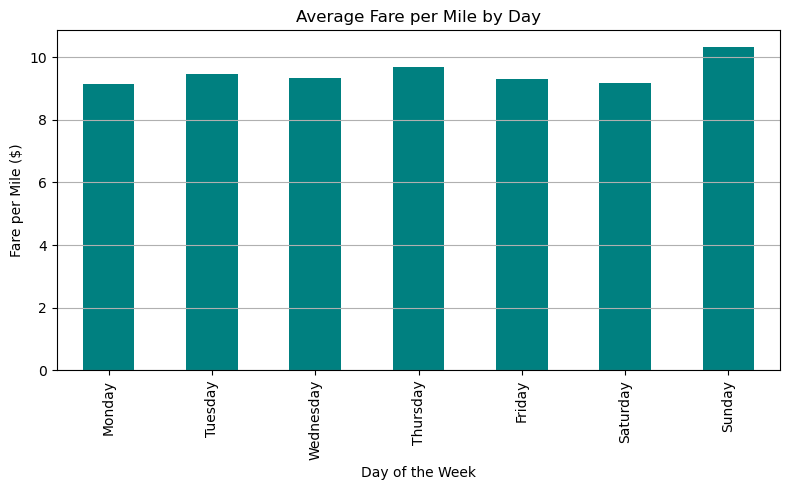


 Average Fare per Mile by Hour of Day:
hour
0      7.70
1      8.72
2      8.17
3      7.42
4     11.31
5     11.82
6      9.87
7      9.09
8      9.02
9      9.09
10     9.27
11     9.74
12     9.97
13    10.11
14    10.19
15    10.22
16    12.26
17    10.46
18     9.70
19     9.35
20     7.98
21     7.99
22     8.31
23     8.53
Name: fare_per_mile, dtype: float64


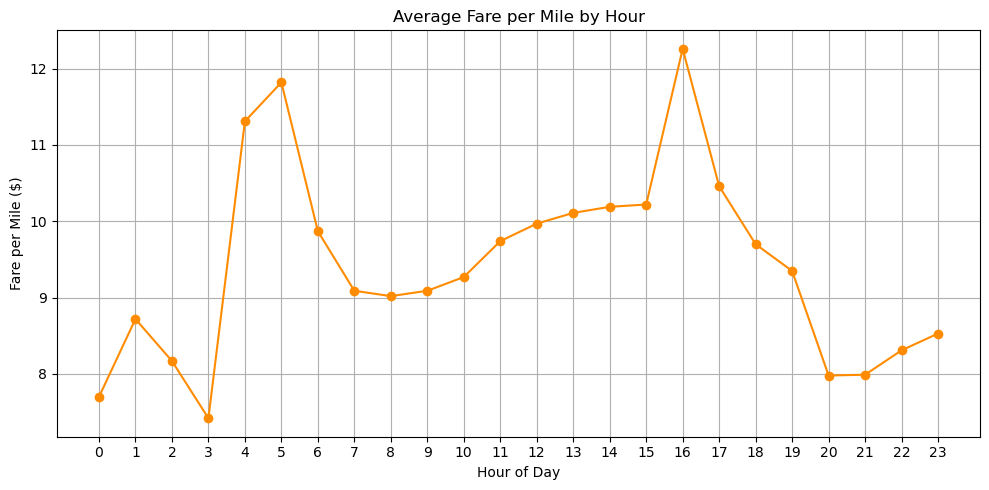

In [655]:
# Compare the average fare per mile for different days and for different times of the day

df_fare_mile = df_new[(df_new['fare_amount'] > 0) & (df_new['trip_distance'] > 0)].copy()
df_fare_mile['fare_per_mile'] = df_fare_mile['fare_amount'] / df_fare_mile['trip_distance']
df_fare_mile['weekday'] = df_fare_mile['tpep_pickup_datetime'].dt.day_name()
fare_by_day = df_fare_mile.groupby('weekday')['fare_per_mile'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).round(2)

print("Average Fare per Mile by Day of the Week:")
print(fare_by_day)
fare_by_day.plot(kind='bar', color='teal', figsize=(8, 5), title='Average Fare per Mile by Day')
plt.ylabel('Fare per Mile ($)')
plt.xlabel('Day of the Week')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
df_fare_mile['hour'] = df_fare_mile['tpep_pickup_datetime'].dt.hour
fare_by_hour = df_fare_mile.groupby('hour')['fare_per_mile'].mean().round(2)

print("\n Average Fare per Mile by Hour of Day:")
print(fare_by_hour)
fare_by_hour.plot(kind='line', marker='o', color='darkorange', figsize=(10, 5), title='Average Fare per Mile by Hour')
plt.ylabel('Fare per Mile ($)')
plt.xlabel('Hour of Day')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

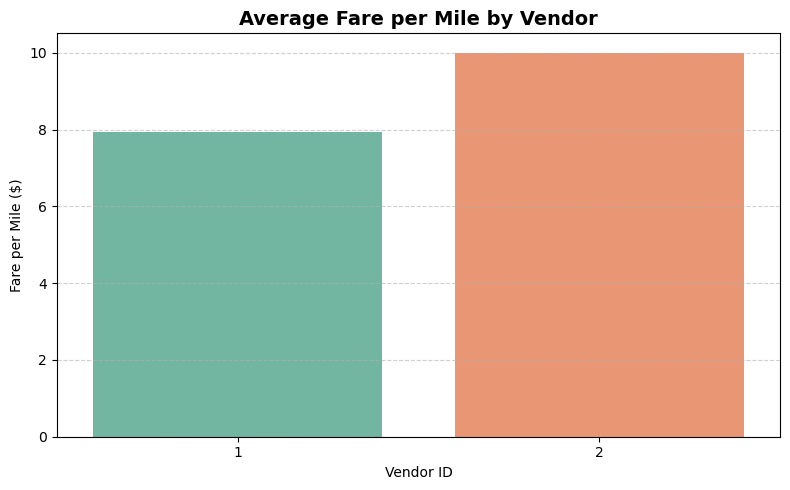

In [657]:
# Compare fare per mile for different vendors

df_cleaned = df_new[(df_new['fare_amount'] > 0) & (df_new['trip_distance'] > 0)].copy()

# Step 2: Calculate fare per mile
df_cleaned['fare_per_mile'] = df_cleaned['fare_amount'] / df_cleaned['trip_distance']

# Step 3: Group by VendorID and calculate mean fare per mile
vendor_fare_stats = df_cleaned.groupby('VendorID')['fare_per_mile'].mean().reset_index()

# Step 4: Rename columns for clarity
vendor_fare_stats.columns = ['Vendor ID', 'Avg Fare per Mile ($)']

# Step 5: Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=vendor_fare_stats, x='Vendor ID', y='Avg Fare per Mile ($)', palette='Set2', hue='Vendor ID', legend=False)

plt.title('Average Fare per Mile by Vendor', fontsize=14, fontweight='bold')
plt.xlabel('Vendor ID')
plt.ylabel('Fare per Mile ($)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


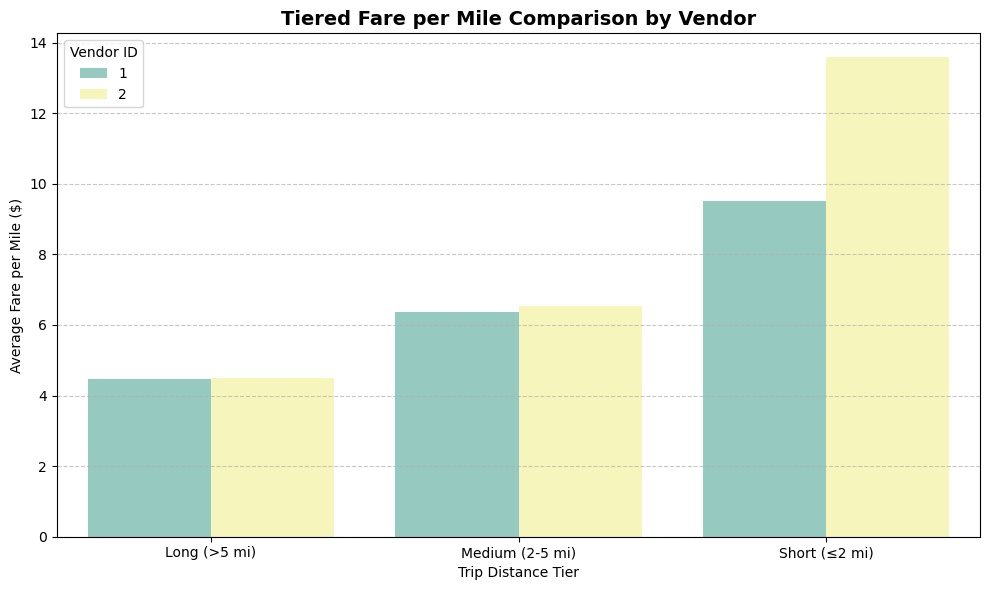

In [659]:
# Defining distance tiers
df_cleaned = df_new[(df_new['fare_amount'] > 0) & (df_new['trip_distance'] > 0)].copy()

# Define distance tiers
def get_distance_tier(miles):
    if miles <= 2:
        return 'Short (≤2 mi)'
    elif miles <= 5:
        return 'Medium (2-5 mi)'
    else:
        return 'Long (>5 mi)'

df_cleaned['distance_tier'] = df_cleaned['trip_distance'].apply(get_distance_tier)

# Calculate fare per mile
df_cleaned['fare_per_mile'] = df_cleaned['fare_amount'] / df_cleaned['trip_distance']

# Group by Vendor and Tier
tiered_fare = df_cleaned.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

# Rename columns
tiered_fare.columns = ['Vendor ID', 'Trip Distance Tier', 'Avg Fare per Mile ($)']

# Plot graph Fare comparison for vendor
plt.figure(figsize=(10, 6))
sns.barplot(data=tiered_fare, x='Trip Distance Tier', y='Avg Fare per Mile ($)', hue='Vendor ID', palette='Set3')

plt.title('Tiered Fare per Mile Comparison by Vendor', fontsize=14, fontweight='bold')
plt.xlabel('Trip Distance Tier')
plt.ylabel('Average Fare per Mile ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

 Tip Percentage by Distance Tier:
distance_tier
0–2 mi     28.845576
2–5 mi     23.158530
5–10 mi    25.579821
>10 mi     21.489648
Name: tip_percent, dtype: float64


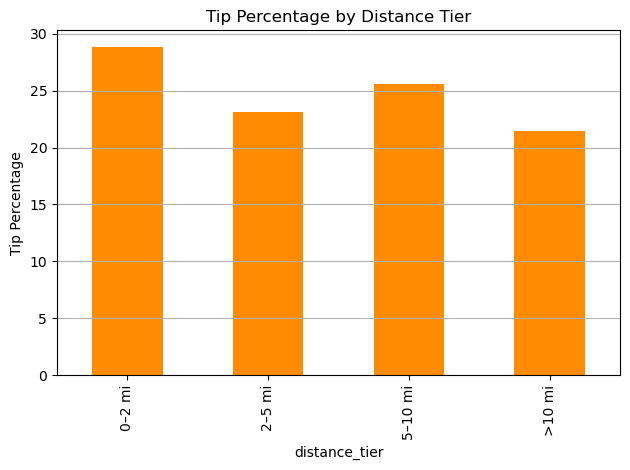


 Tip Percentage by Passenger Count:
passenger_count
1.0    26.511819
2.0    25.817455
3.0    25.809235
4.0    25.889196
5.0    26.048419
6.0    26.161426
Name: tip_percent, dtype: float64


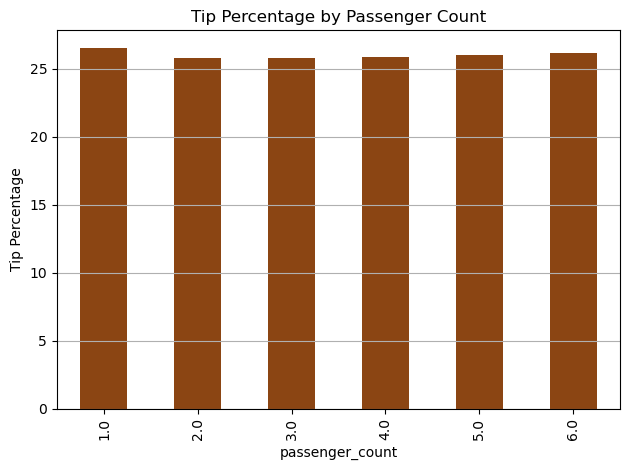


Tip Percentage by Hour of Day:
hour
0     25.86
1     26.15
2     26.57
3     27.56
4     27.08
5     26.14
6     25.28
7     25.00
8     25.02
9     25.30
10    25.54
11    25.53
12    25.41
13    25.44
14    25.19
15    25.04
16    27.15
17    30.87
18    27.59
19    27.46
20    26.49
21    26.28
22    26.03
23    25.77
Name: tip_percent, dtype: float64


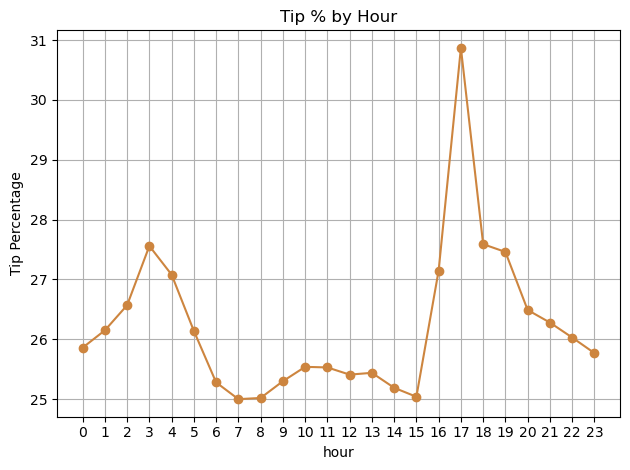

In [661]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df_cleaned = df_new[(df_new['fare_amount'] > 0) & (df_new['tip_amount'] >= 0)].copy()

# Calculate tip percentage
df_cleaned['tip_percent'] = (df_cleaned['tip_amount'] / df_cleaned['fare_amount']) * 100
df_cleaned['distance_tier'] = pd.cut(
    df_cleaned['trip_distance'],
    bins=[0, 2, 5, 10, float('inf')],
    labels=['0–2 mi', '2–5 mi', '5–10 mi', '>10 mi']
)

# Average tip Percentage by distance tier
tip_by_distance = df_cleaned.groupby('distance_tier', observed=True)['tip_percent'].mean()

print(" Tip Percentage by Distance Tier:")
print(tip_by_distance)
tip_by_distance.plot(kind='bar', color='darkorange', title='Tip Percentage by Distance Tier')
plt.ylabel("Tip Percentage")
plt.grid(axis='y')
plt.tight_layout()
plt.show()
tip_by_passenger = df_cleaned.groupby('passenger_count')['tip_percent'].mean()

print("\n Tip Percentage by Passenger Count:")
print(tip_by_passenger)
tip_by_passenger.plot(kind='bar', color='saddlebrown', title='Tip Percentage by Passenger Count')
plt.ylabel("Tip Percentage")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

df_cleaned['hour'] = df_cleaned['tpep_pickup_datetime'].dt.hour

tip_by_hour = df_cleaned.groupby('hour')['tip_percent'].mean().round(2)

print("\nTip Percentage by Hour of Day:")
print(tip_by_hour)

tip_by_hour.plot(kind='line', marker='o', color='peru', title='Tip % by Hour')
plt.ylabel("Tip Percentage")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [431]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

Average Passenger Count by Hour of Day:
hour
0     1.425603
1     1.435238
2     1.446680
3     1.457434
4     1.419797
5     1.297310
6     1.255578
7     1.274706
8     1.284541
9     1.299749
10    1.340824
11    1.353979
12    1.365398
13    1.366540
14    1.374758
15    1.393645
16    1.386717
17    1.369032
18    1.355933
19    1.370371
20    1.379958
21    1.410307
22    1.417162
23    1.414336
Name: passenger_count, dtype: float64


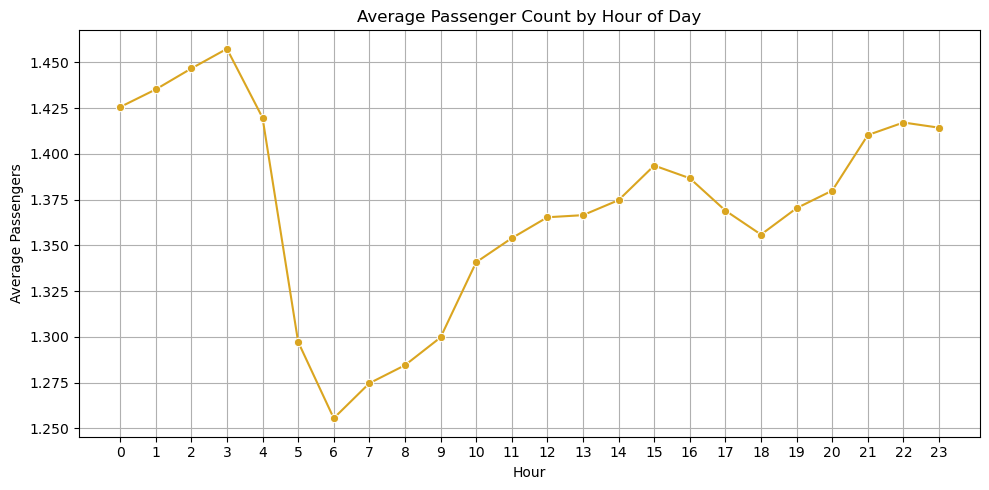

In [663]:
# See how passenger count varies across hours and days

passenger_by_hour = df_new.groupby('hour')['passenger_count'].mean()
print("Average Passenger Count by Hour of Day:")
print(passenger_by_hour)
# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=passenger_by_hour.index, y=passenger_by_hour.values, marker='o', color='#DAA520')
plt.title("Average Passenger Count by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average Passengers")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

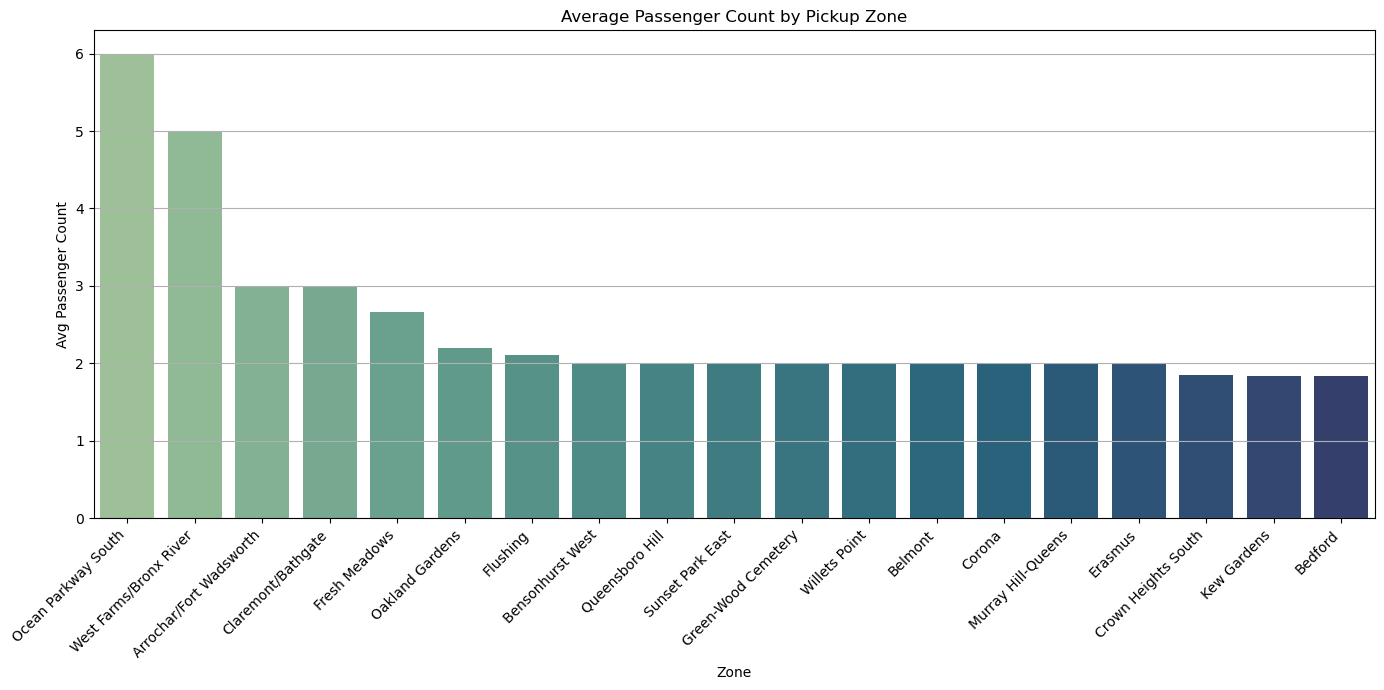

In [665]:
# How does passenger count vary across zones
# Group by pickup location and calculate average passenger count
zone_passenger_count = df_new.groupby('PULocationID')['passenger_count'].mean().reset_index()

# Merge with zone names
zone_passenger_count = zone_passenger_count.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID')

# Sort data
zone_passenger_count = zone_passenger_count.sort_values(by='passenger_count', ascending=False)

# plot Average Passenger Count by Pickup Zone
plt.figure(figsize=(14, 7))
sns.barplot(data=zone_passenger_count.head(20),  # Top 20 for readability
            x='zone', y='passenger_count',hue='zone', palette='crest',legend=False)
plt.title('Average Passenger Count by Pickup Zone')
plt.xlabel('Zone')
plt.ylabel('Avg Passenger Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [457]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Calculate average passenger count per pickup zone
avg_passenger_by_zone = df_new.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_zone.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)

# Merge with zones shapefile
zones_with_trips = zones.merge(avg_passenger_by_zone, left_on='LocationID', right_on='PULocationID', how='left')


<Figure size 1500x1000 with 0 Axes>

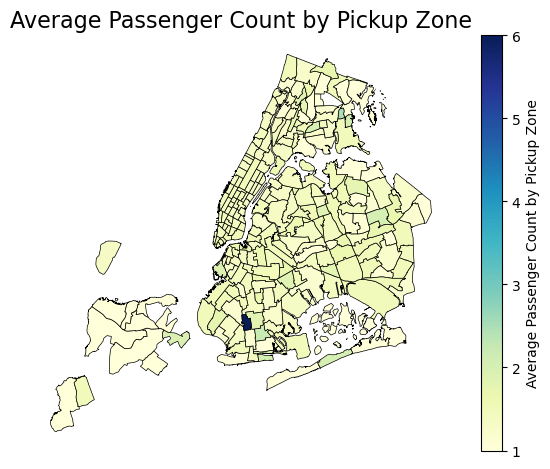

In [667]:
plt.figure(figsize=(15, 10))
zones_with_trips.plot(column='avg_passenger_count',
                      cmap='YlGnBu', legend=True,
                      edgecolor='black', linewidth=0.5,
                      legend_kwds={'label': "Average Passenger Count by Pickup Zone"})
plt.title("Average Passenger Count by Pickup Zone", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

 extra: applied in 897,631 trips (63.53%)
 mta_tax: applied in 1,404,853 trips (99.43%)
 improvement_surcharge: applied in 1,412,842 trips (100.00%)
 congestion_surcharge: applied in 1,341,414 trips (94.94%)
 airport_fee: applied in 57,789 trips (4.09%)


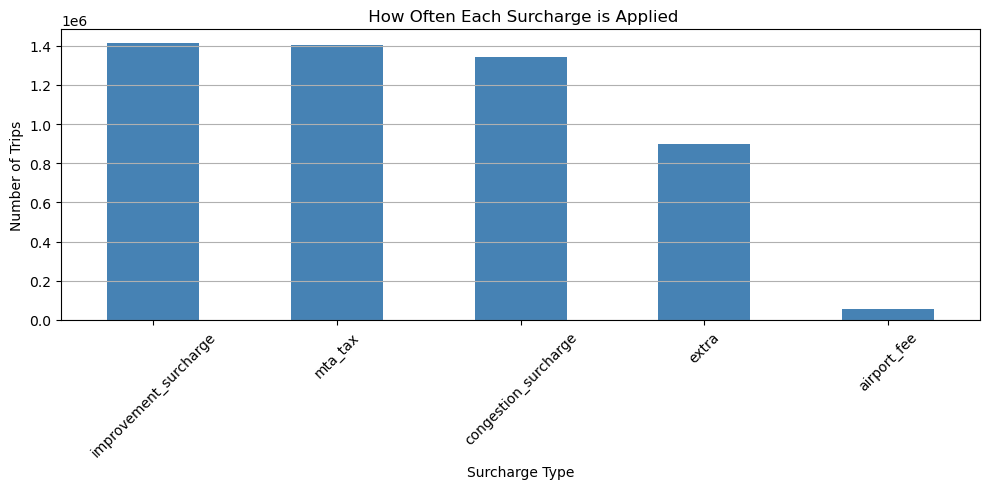

In [669]:
# How often is each surcharge applied?
surcharge_cols = ['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee']

for col in surcharge_cols:
    count_applied = (df_new[col] > 0).sum()
    percentage = (count_applied / len(df_new)) * 100
    print(f" {col}: applied in {count_applied:,} trips ({percentage:.2f}%)")
    surcharge_counts = {col: (df_new[col] > 0).sum() for col in surcharge_cols}

surcharge_df = pd.DataFrame.from_dict(surcharge_counts, orient='index', columns=['count'])
surcharge_df['percentage'] = (surcharge_df['count'] / len(df_new)) * 100
surcharge_df = surcharge_df.sort_values(by='count', ascending=False)
plt.figure(figsize=(10, 5))
surcharge_df['count'].plot(kind='bar', color='steelblue')

plt.title(" How Often Each Surcharge is Applied")
plt.xlabel("Surcharge Type")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**Avoid Slow Routes**

Use average speed data to dynamically reroute taxis away from zones that exhibit slow speeds during certain hours.
For example Two Bridges/Seward Park to Downtown Brooklyn/ Metrotech is very slow during afternon 1 PM.
Hence this route should be avoided at this time

**Conscious Allocation of Fleets**

We see a high demand between 5 PM to 8 PM and late night (11 PM to 2 AM). Fleet should be available at this time to meet the demand.
Certain zones have high demand at certain time. Like during night time airport,stations,entertainment zones like East Village, JFK Airport 
have high pickup and dropoff. Hence, fleets should be avialable in these zones during night time.

**Zone based Analysis**

Zones with low pickup to dropoff ratios indicate far more dropoffs than pickups, suggesting that taxis return idle post drop-off.
Hence it makes sense to relocate these taxis to nearby high pickup zones.
Station more taxis at zones where pickup is high.



**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**Prioritizing zone based on Weekday and Weekend**

Weekdays: Prioritize business districts and office-heavy areas during mornings and evenings.

Weekends: Position taxis near recreational or shopping zones(e.g Brooklyn Bridge Park, Central Park, Greenwich Village).

**Prioritizing zone based on Monthly data**

We see more pickups in month of May which indicate summer break. Hence boost fleet coverage in zones near tourist attractions and airports.

We see more pickup in month of October November and December which can be because of festivities and winter break. Station cabs at recreation zones.

**Prioritizing zone based on Hourly data**

Increase fleet presence during peak hours (e.g., 8 AM–10 AM, 5 PM–8 PM) as they show the highest pickup density. Station cabs near resedential
area and office spots.

During night hours (11 PM – 5 AM), reposition vehicles toward hotspots like airports, transit stations, or nightlife zones.

Avoid stationing cab where pickup is low.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

**Pricing by Distance**

Short trips (<2 miles): Slight base fare increase. This will motivate drivers to cater to short request as their profit will be more

Mid-distance trips (2–5 miles): Optimize per-mile rates as this is where most trips will lie and has most revenue generation prospect.

Long trips (>5 miles): Offer discounts for popular destinations (e.g., airport routes) to attract more riders.

**Pricing by Demand**

During peak time ( morning : 8 AM–10 AM, 5 PM–8 PM) (night: 11 PM – 5 AM) increase price which will bring more revenue as well as drivers will
be motivated to work especially during night time and weekends.